<a href="https://colab.research.google.com/github/AnantSabharwal/NHFS5_Analysis/blob/master/NFHS5_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Anant Sabharwal
#200968138

In [ ]:
 !pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anantsabharwal","key":"d9090f91617be10095218c998d97ca64"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rohitdwivedula/national-family-health-survey-5-india

 99% 419M/422M [00:07<00:00, 40.4MB/s]
100% 422M/422M [00:07<00:00, 61.3MB/s]


In [ ]:
!unzip /content/national-family-health-survey-5-india.zip

Archive:  /content/national-family-health-survey-5-india.zip
  inflating: districtwise_data/json/andaman_nicobar_island_ut/nicobar.json  
  inflating: districtwise_data/json/andaman_nicobar_island_ut/north_middle_andaman.json  
  inflating: districtwise_data/json/andaman_nicobar_island_ut/south_andaman.json  
  inflating: districtwise_data/json/andhra_pradesh/anantapur.json  
  inflating: districtwise_data/json/andhra_pradesh/chittoor.json  
  inflating: districtwise_data/json/andhra_pradesh/east_godavari.json  
  inflating: districtwise_data/json/andhra_pradesh/guntur.json  
  inflating: districtwise_data/json/andhra_pradesh/krishna.json  
  inflating: districtwise_data/json/andhra_pradesh/kurnool.json  
  inflating: districtwise_data/json/andhra_pradesh/prakasam.json  
  inflating: districtwise_data/json/andhra_pradesh/sri_potti_sriramulu_nellore.json  
  inflating: districtwise_data/json/andhra_pradesh/srikakulam.json  
  inflating: districtwise_data/json/andhra_pradesh/visakhapatna

### Importing Libraries

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [ ]:
parent_folder = '/content/districtwise_data/json'

In [ ]:
def find_json_files(directory):
    json_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.json'):
                json_files.append(os.path.join(root, file))
    return json_files

In [ ]:
dfs = []

In [ ]:
json_files  = find_json_files(parent_folder)

In [ ]:
for json_file in json_files:
    with open(json_file, 'r') as file:
        data = json.load(file)
        indicators = data.get('indicators', {})
        indicator_data = {'filename': os.path.basename(json_file), 'folder_name': os.path.basename(os.path.dirname(json_file))}
        for key, value in indicators.items():
            indicator_key = f"{key}.indicator"
            value_key = f"{key}.value"
            indicator_data[indicator_key] = value['indicator']
            indicator_data[value_key] = value['value']
        df = pd.DataFrame([indicator_data])
        dfs.append(df)


In [ ]:
final_df = pd.concat(dfs, ignore_index=True)

In [ ]:
final_df

,filename,folder_name,1.indicator,1.value,2.indicator,2.value,3.indicator,3.value,4.indicator,4.value,...,100.indicator,100.value,101.indicator,101.value,102.indicator,102.value,103.indicator,103.value,104.indicator,104.value
0,jayashankar_bhupalapally.json,telangana,Female population age 6 years and above who e...,52.4,Population below age 15 years (%),18.5,Sex ratio of the total population (females pe...,1079.0,Sex ratio at birth for children born in the l...,903.0,...,Ever undergone an oral cavity examination for...,4.9,Women age 15 years and above who use any kind...,5.6,Men age 15 years and above who use any kind o...,27.4,Women age 15 years and above who consume alco...,4.3,Men age 15 years and above who consume alcoho...,53.1
1,warangal_urban.json,telangana,Female population age 6 years and above who e...,70.3,Population below age 15 years (%),20.2,Sex ratio of the total population (females pe...,1087.0,Sex ratio at birth for children born in the l...,829.0,...,Ever undergone an oral cavity examination for...,0.4,Women age 15 years and above who use any kind...,1.5,Men age 15 years and above who use any kind o...,14.0,Women age 15 years and above who consume alco...,2.9,Men age 15 years and above who consume alcoho...,43.3
2,suryapet.json,telangana,Female population age 6 years and above who e...,57.4,Population below age 15 years (%),18.9,Sex ratio of the total population (females pe...,1032.0,Sex ratio at birth for children born in the l...,980.0,...,Ever undergone an oral cavity examination for...,4.1,Women age 15 years and above who use any kind...,3.0,Men age 15 years and above who use any kind o...,20.8,Women age 15 years and above who consume alco...,6.1,Men age 15 years and above who consume alcoho...,46.7
3,mahabubabad.json,telangana,Female population age 6 years and above who e...,55.0,Population below age 15 years (%),21.8,Sex ratio of the total population (females pe...,1067.0,Sex ratio at birth for children born in the l...,885.0,...,Ever undergone an oral cavity examination for...,2.0,Women age 15 years and above who use any kind...,5.0,Men age 15 years and above who use any kind o...,28.1,Women age 15 years and above who consume alco...,12.6,Men age 15 years and above who consume alcoho...,56.5
4,warangal_rural.json,telangana,Female population age 6 years and above who e...,51.8,Population below age 15 years (%),17.3,Sex ratio of the total population (females pe...,1070.0,Sex ratio at birth for children born in the l...,698.0,...,Ever undergone an oral cavity examination for...,3.8,Women age 15 years and above who use any kind...,2.8,Men age 15 years and above who use any kind o...,23.2,Women age 15 years and above who consume alco...,6.5,Men age 15 years and above who consume alcoho...,54.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,mokokchung.json,nagaland,Female population age 6 years and above who e...,88.0,Population below age 15 years (%),20.4,Sex ratio of the total population (females pe...,1041.0,Sex ratio at birth for children born in the l...,1075.0,...,Ever undergone an oral cavity examination for...,0.0,Women age 15 years and above who use any kind...,22.2,Men age 15 years and above who use any kind o...,53.0,Women age 15 years and above who consume alco...,0.4,Men age 15 years and above who consume alcoho...,23.4
700,tuensang.json,nagaland,Female population age 6 years and above who e...,80.5,Population below age 15 years (%),32.8,Sex ratio of the total population (females pe...,946.0,Sex ratio at birth for children born in the l...,902.0,...,Ever undergone an oral cavity examination for...,0.5,Women age 15 years and above who use any kind...,14.9,Men age 15 years and above who use any kind o...,50.2,Women age 15 years and above who consume alco...,0.6,Men age 15 years and above who consume alcoho...,18.5
701,kiphire.json,nagaland,Female population age 6 years and above who e...,77.4,Population below age 15 years (%),32.4,Sex ratio of the total

In [ ]:
for column in final_df.columns:
    if column.endswith('.indicator'):
        indicator_num = column.split('.')[0]
        value_column_name = f"{indicator_num}.value"
        indicator_name = final_df[column][0]
        final_df.rename(columns={value_column_name: indicator_name}, inplace=True)

In [ ]:
final_df = final_df.drop(final_df.filter(regex='\.indicator$').columns, axis=1)

In [ ]:
final_df.head()

,district_name,state_name,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),Deaths in the last 3 years registered with the civil authority (%),Population living in households with electricity (%),Population living in households with an improved drinking-water source1 (%),...,Mildly elevated blood pressure (Systolic 140-159 mm of Hg and/or Diastolic 90-99 mm of Hg) (%),Moderately or severely elevated blood pressure (Systolic ≥160mm of Hg and/or Diastolic ≥100mm of Hg) (%),Elevated blood pressure (Systolic ≥140 mm of Hg and/or Diastolic ≥90 mm of Hg) or taking medicine to control blood pressure (%),Ever undergone a screening test for cervical cancer (%),Ever undergone a breast examination for breast cancer (%),Ever undergone an oral cavity examination for oral cancer (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,jayashankar_bhupalapally,telangana,52.4,18.5,1079.0,903.0,90.9,58.9,99.3,95.1,...,20.8,7.5,31.5,7.3,0.8,4.9,5.6,27.4,4.3,53.1
1,warangal_urban,telangana,70.3,20.2,1087.0,829.0,82.4,77.7,99.6,99.1,...,17.6,8.5,32.7,1.4,0.0,0.4,1.5,14.0,2.9,43.3
2,suryapet,telangana,57.4,18.9,1032.0,980.0,92.7,70.1,99.4,99.8,...,17.1,5.8,27.3,5.3,0.4,4.1,3.0,20.8,6.1,46.7
3,mahabubabad,telangana,55.0,21.8,1067.0,885.0,91.0,70.0,99.6,98.2,...,18.4,7.2,28.8,1.8,0.5,2.0,5.0,28.1,12.6,56.5
4,warangal_rural,telangana,51.8,17.3,1070.0,698.0,82.6,70.3,99.7,99.0,...,17.4,8.5,29.4,5.5,1.1,3.8,2.8,23.2,6.5,54.4


In [ ]:
final_df.rename(columns={'filename': 'district_name'}, inplace=True)
final_df.rename(columns={'folder_name': 'state_name'}, inplace=True)

In [ ]:
final_df['district_name'] = final_df['district_name'].str.replace('.json', '')

<ipython-input-18-489c7f3f2013>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  final_df['district_name'] = final_df['district_name'].str.replace('.json', '')


In [ ]:
#saving a copy of the dataframe created to csv
csv_path = "/content/national-family-health-survey-5.csv"
final_df.to_csv(csv_path, index=False)

### Analysis on the data

In [ ]:
nfhs = final_df.copy()

In [ ]:
nfhs.shape

(704, 106)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#seeing all the columns
for col in nfhs.columns:
  print(col)

district_name
state_name
 Female population age 6 years and above who ever attended school (%)
 Population below age 15 years (%)
 Sex ratio of the total population (females per 1,000 males)
 Sex ratio at birth for children born in the last five years (females per 1,000 males)
 Children under age 5 years whose birth was registered with the civil authority (%)
 Deaths in the last 3 years registered with the civil authority (%)
 Population living in households with electricity (%)
 Population living in households with an improved drinking-water source1 (%)
 Population living in households that use an improved sanitation facility2 (%)
 Households using clean fuel for cooking3 (%)
 Households using iodized salt (%)
 Households with any usual member covered under a health insurance/financing scheme (%)
 Children age 5 years who attended pre-primary school during the school year 2019-20 (%)
 Women who are literate4 (%)
 Women with 10 or more years of schooling (%)
 Women age 20-24 years marr

In [ ]:
list(nfhs.columns)

['district_name',
 'state_name',
 ' Female population age 6 years and above who ever attended school (%)',
 ' Population below age 15 years (%)',
 ' Sex ratio of the total population (females per 1,000 males)',
 ' Sex ratio at birth for children born in the last five years (females per 1,000 males)',
 ' Children under age 5 years whose birth was registered with the civil authority (%)',
 ' Deaths in the last 3 years registered with the civil authority (%)',
 ' Population living in households with electricity (%)',
 ' Population living in households with an improved drinking-water source1 (%)',
 ' Population living in households that use an improved sanitation facility2 (%)',
 ' Households using clean fuel for cooking3 (%)',
 ' Households using iodized salt (%)',
 ' Households with any usual member covered under a health insurance/financing scheme (%)',
 ' Children age 5 years who attended pre-primary school during the school year 2019-20 (%)',
 ' Women who are literate4 (%)',
 ' Women 

In [ ]:
nfhs.rename(columns=lambda x: x.strip(), inplace=True)

##### overall vaccination coverage for children age 12-23 months based on vaccination card or mother's recall?

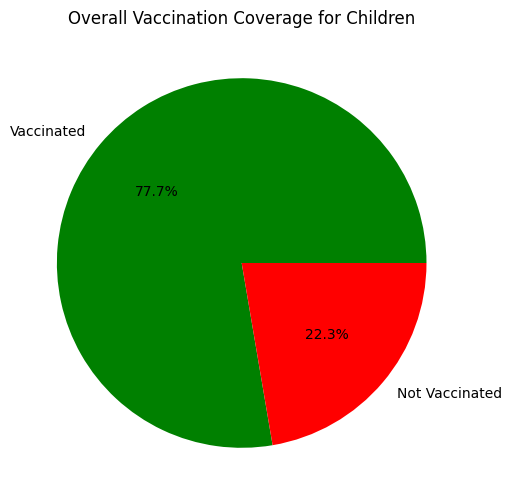

In [ ]:
overall_vaccination_coverage = nfhs["Children age 12-23 months fully vaccinated based on information from either vaccination card or mother's recall11 (%)"].mean()

plt.figure(figsize=(6, 6))
plt.pie([overall_vaccination_coverage, 100 - overall_vaccination_coverage], labels=['Vaccinated', 'Not Vaccinated'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Overall Vaccination Coverage for Children')
plt.show()


#####  percentage of children age 12-23 months who have received BCG vaccine?

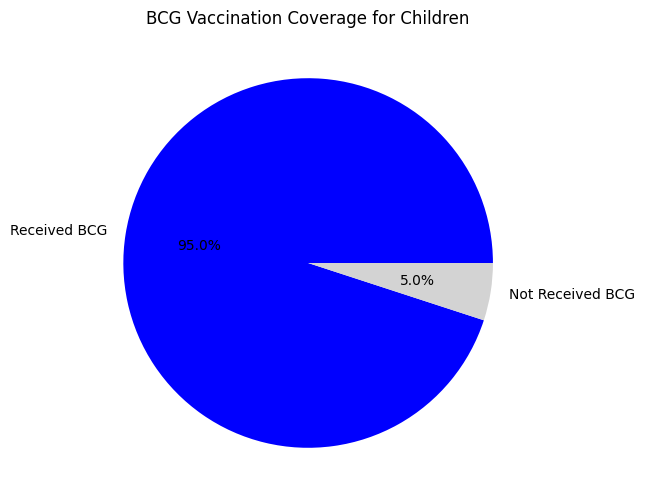

In [ ]:
bcg_coverage = nfhs['Children age 12-23 months who have received BCG (%)'].mean()

plt.figure(figsize=(6, 6))
plt.pie([bcg_coverage, 100 - bcg_coverage], labels=['Received BCG', 'Not Received BCG'], autopct='%1.1f%%', colors=['blue', 'lightgray'])
plt.title('BCG Vaccination Coverage for Children')
plt.show()


##### vaccination coverage vary by state?

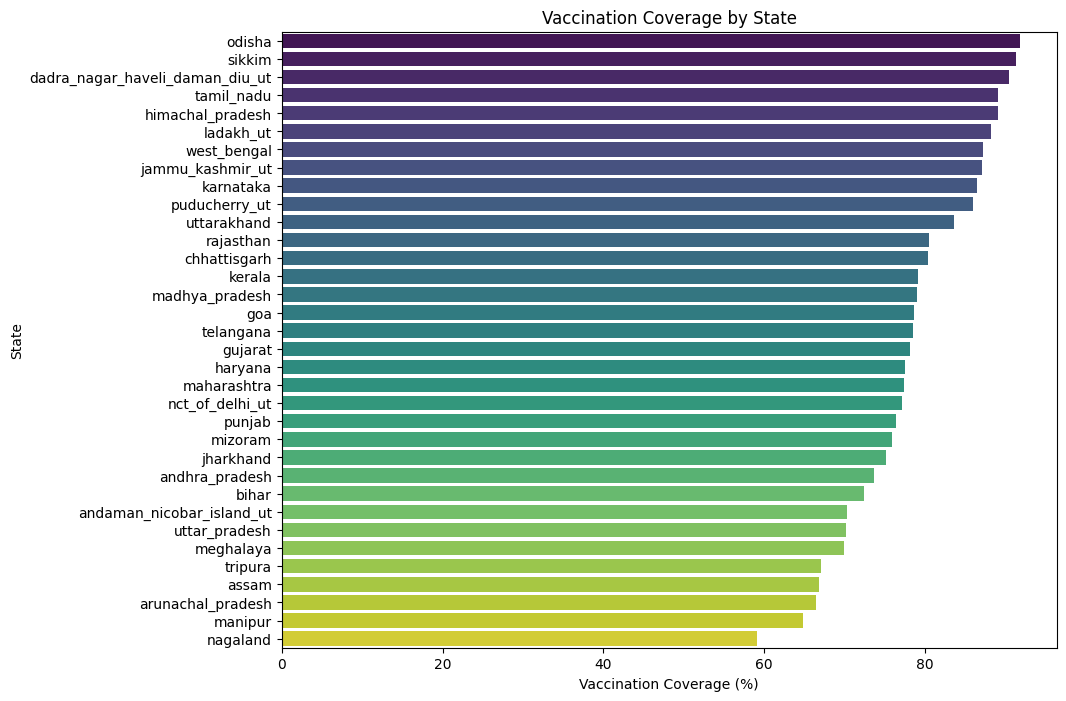

In [ ]:
state_vaccination_coverage = nfhs.groupby('state_name')['Children age 12-23 months fully vaccinated based on information from either vaccination card or mother\'s recall11 (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=state_vaccination_coverage, y=state_vaccination_coverage.index, palette='viridis')
plt.title('Vaccination Coverage by State')
plt.xlabel('Vaccination Coverage (%)')
plt.ylabel('State')
plt.show()


##### percentage of children have received the first dose of measles-containing vaccine (MCV)?

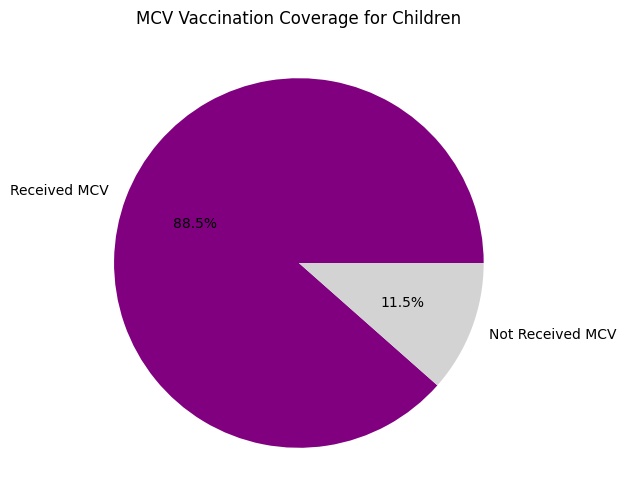

In [ ]:
mcv_coverage = nfhs['Children age 12-23 months who have received the first dose of measles-containing vaccine (MCV) (%)'].mean()

plt.figure(figsize=(6, 6))
plt.pie([mcv_coverage, 100 - mcv_coverage], labels=['Received MCV', 'Not Received MCV'], autopct='%1.1f%%', colors=['purple', 'lightgray'])
plt.title('MCV Vaccination Coverage for Children')
plt.show()


##### percentage of children who received the second dose of MCV vary by district?

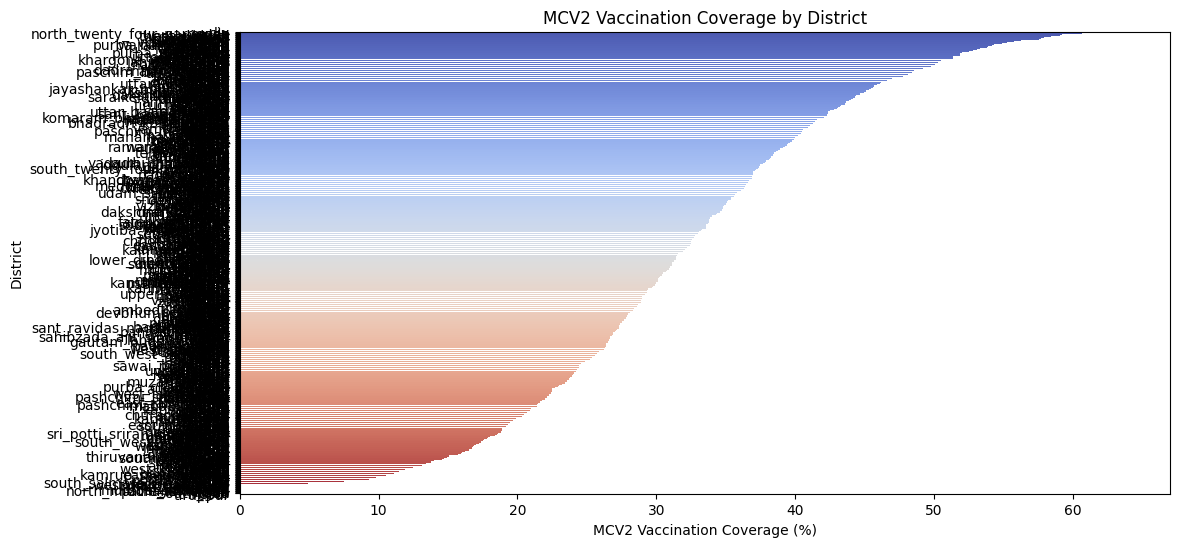

In [ ]:
mcv2_coverage_by_district = nfhs.groupby('district_name')['Children age 24-35 months who have received a second dose of measles-containing vaccine (MCV) (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=mcv2_coverage_by_district, y=mcv2_coverage_by_district.index, palette='coolwarm')
plt.title('MCV2 Vaccination Coverage by District')
plt.xlabel('MCV2 Vaccination Coverage (%)')
plt.ylabel('District')
plt.show()


##### percentage of children who received the second dose of MCV vary by state?

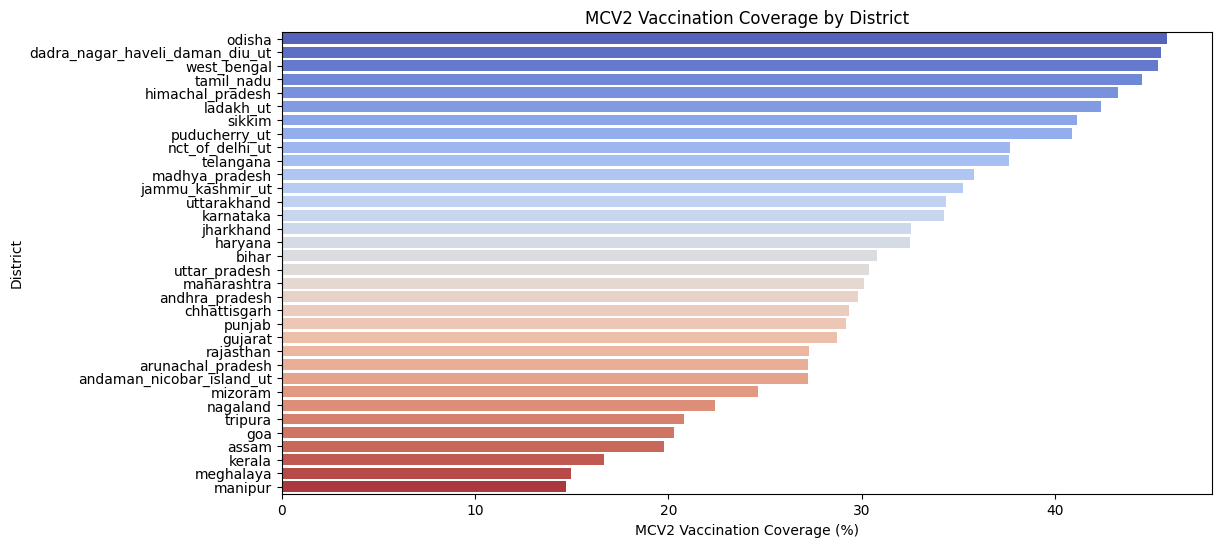

In [ ]:
mcv2_coverage_by_district = nfhs.groupby('state_name')['Children age 24-35 months who have received a second dose of measles-containing vaccine (MCV) (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=mcv2_coverage_by_district, y=mcv2_coverage_by_district.index, palette='coolwarm')
plt.title('MCV2 Vaccination Coverage by District')
plt.xlabel('MCV2 Vaccination Coverage (%)')
plt.ylabel('District')
plt.show()

##### correlation between the percentage of children who received 3 doses of polio vaccine and the percentage of children who received 3 doses of penta or DPT vaccine?

In [ ]:
correlation = nfhs['Children age 12-23 months who have received 3 doses of polio vaccine13 (%)'].corr(df['Children age 12-23 months who have received 3 doses of penta or DPT vaccine (%)'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=nfhs, x='Children age 12-23 months who have received 3 doses of polio vaccine13 (%)', y='Children age 12-23 months who have received 3 doses of penta or DPT vaccine (%)', color='blue')
plt.title(f'Correlation between 3 Doses of Polio and 3 Doses of Penta/DPT Vaccine\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('3 Doses of Polio Vaccine (%)')
plt.ylabel('3 Doses of Penta/DPT Vaccine (%)')
plt.show()


KeyError: ignored

##### prevalence of children with severe wasting (weight-for-height) vary by state

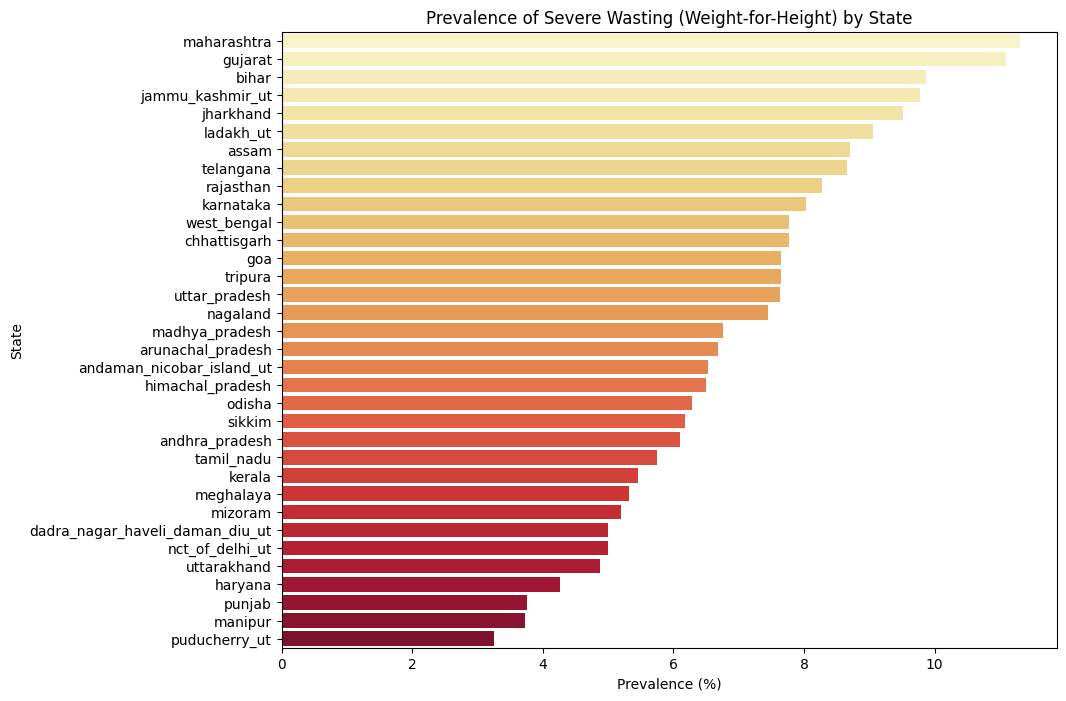

In [ ]:
severe_wasting_by_state = nfhs.groupby('state_name')['Children under 5 years who are severely wasted (weight-for-height)19 (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=severe_wasting_by_state, y=severe_wasting_by_state.index, palette='YlOrRd')
plt.title('Prevalence of Severe Wasting (Weight-for-Height) by State')
plt.xlabel('Prevalence (%)')
plt.ylabel('State')
plt.show()


##### prevalence of children under 5 years who are stunted (height-for-age) vary by district within a specific state

In [ ]:
states_list = nfhs.state_name.unique()

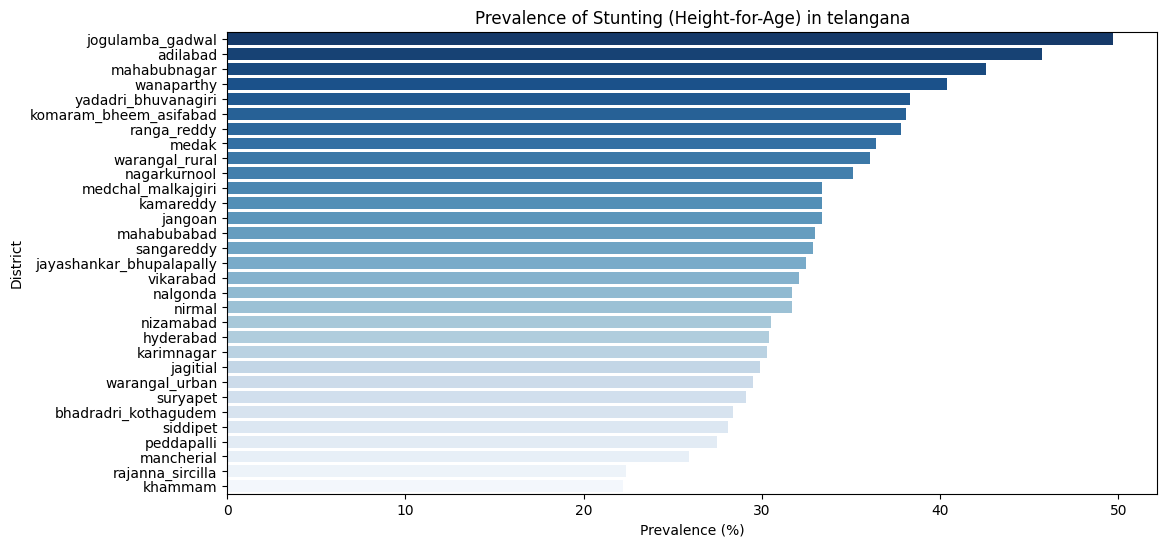

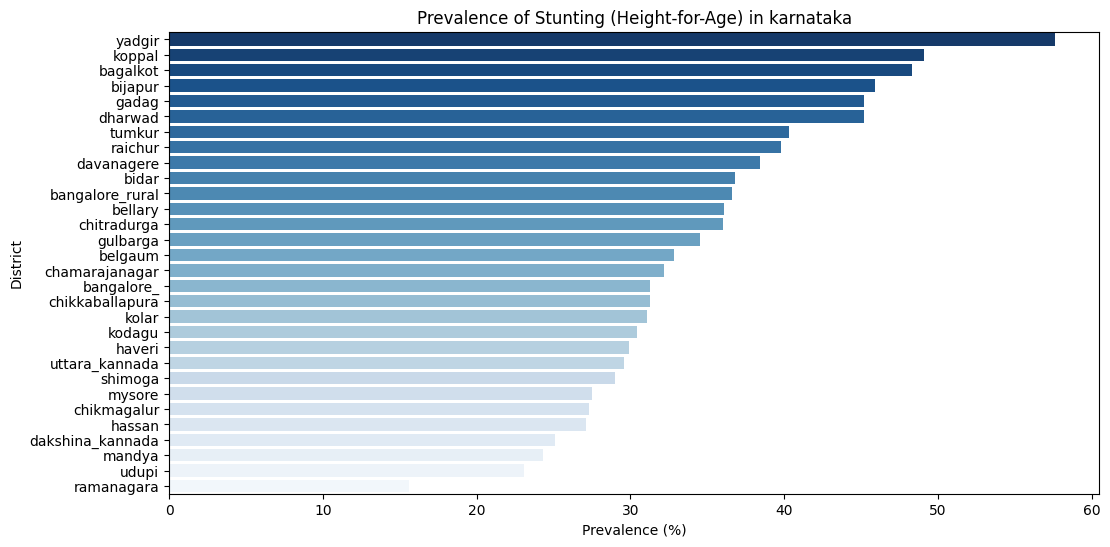

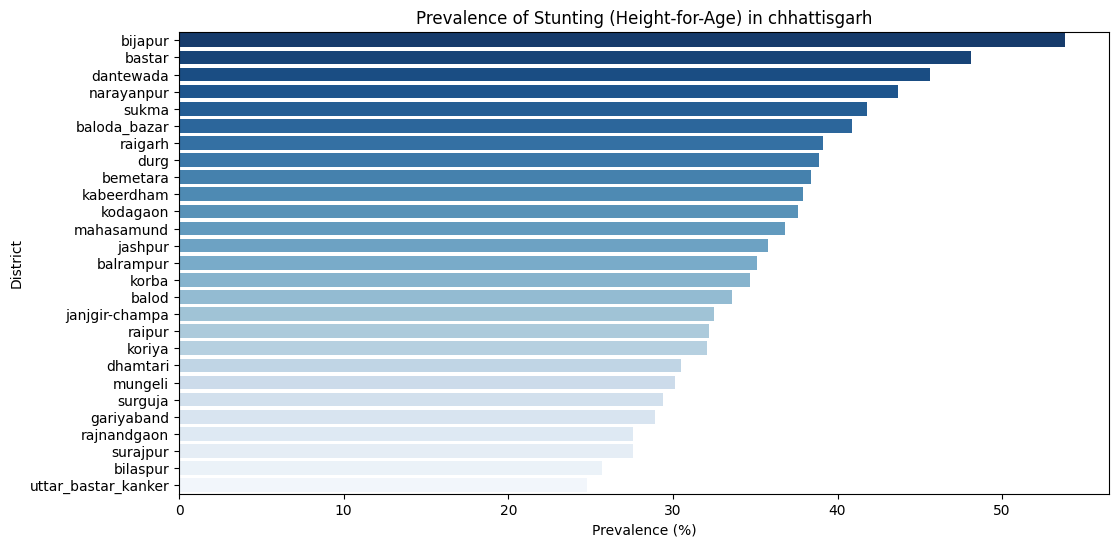

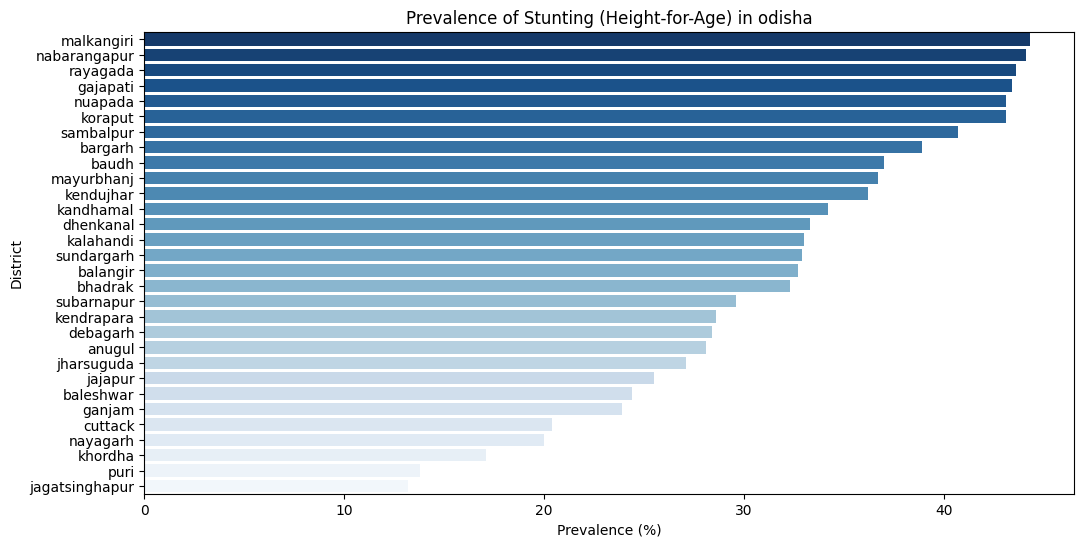

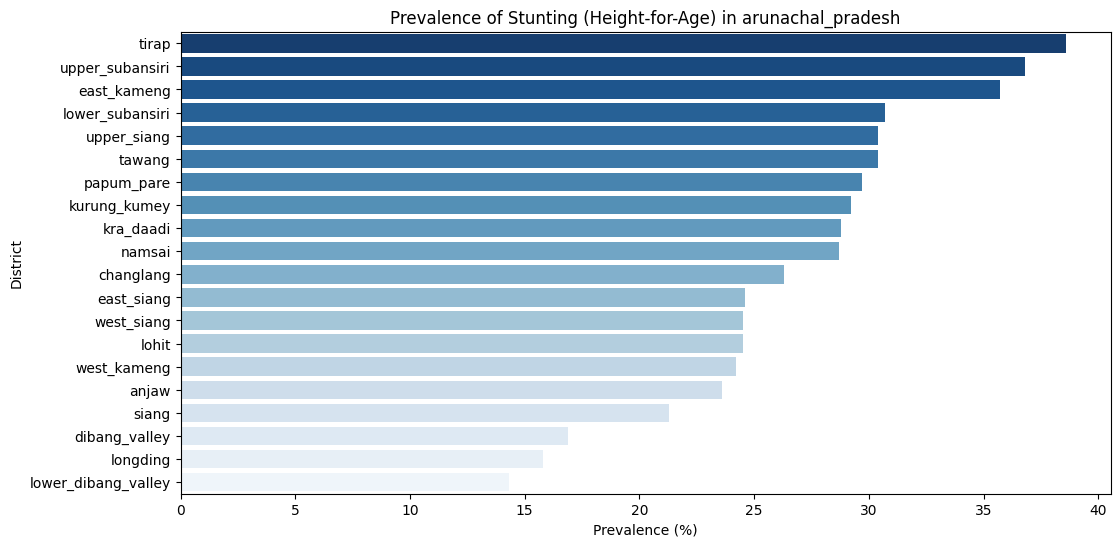

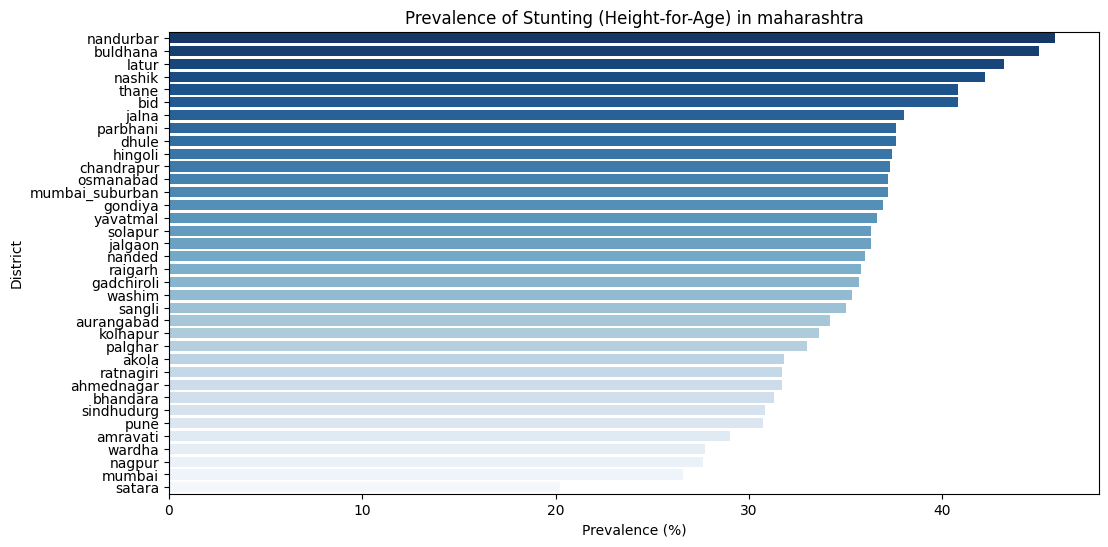

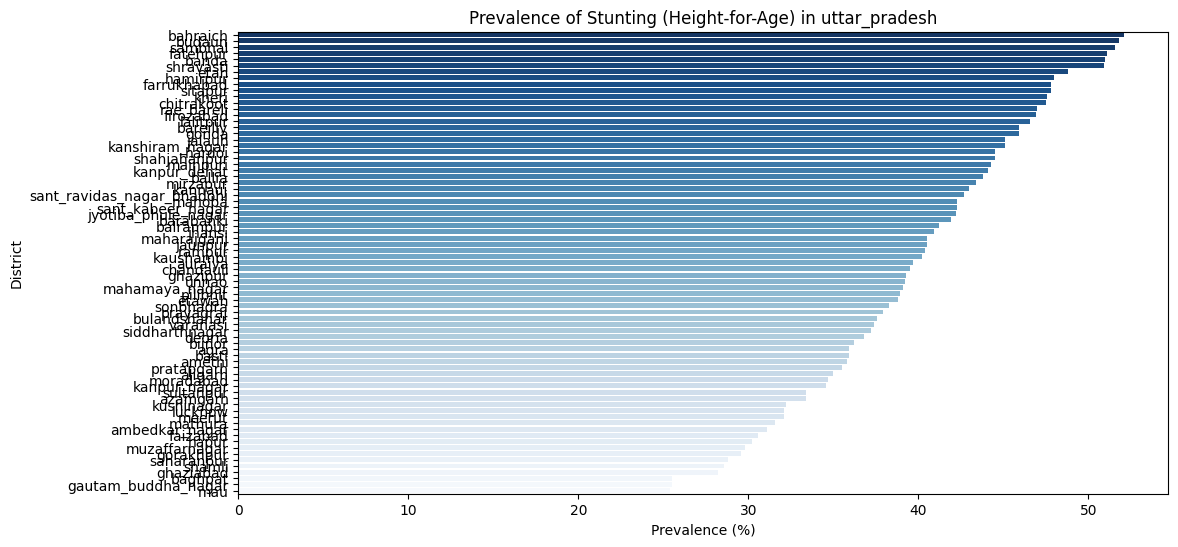

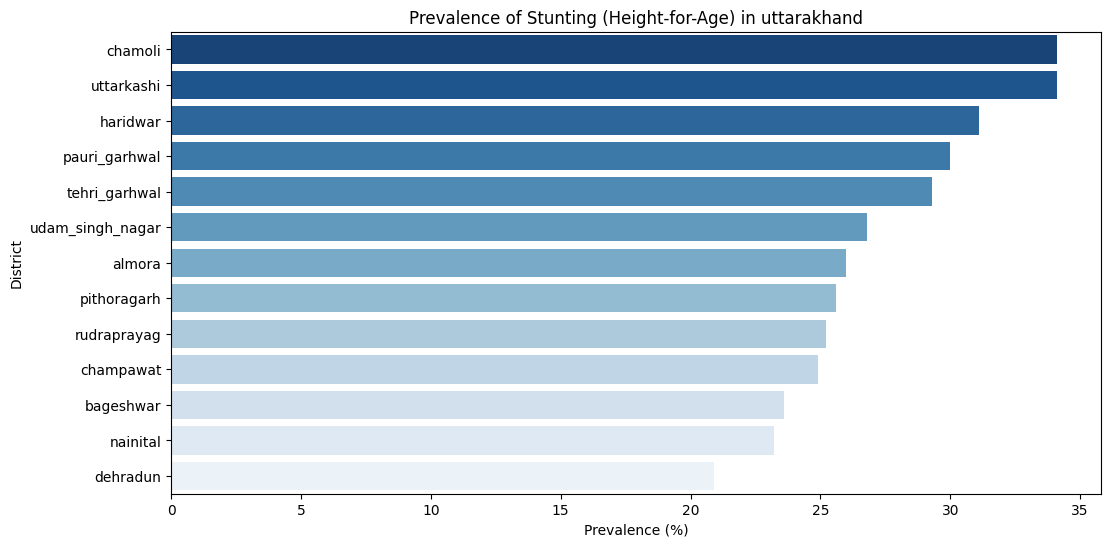

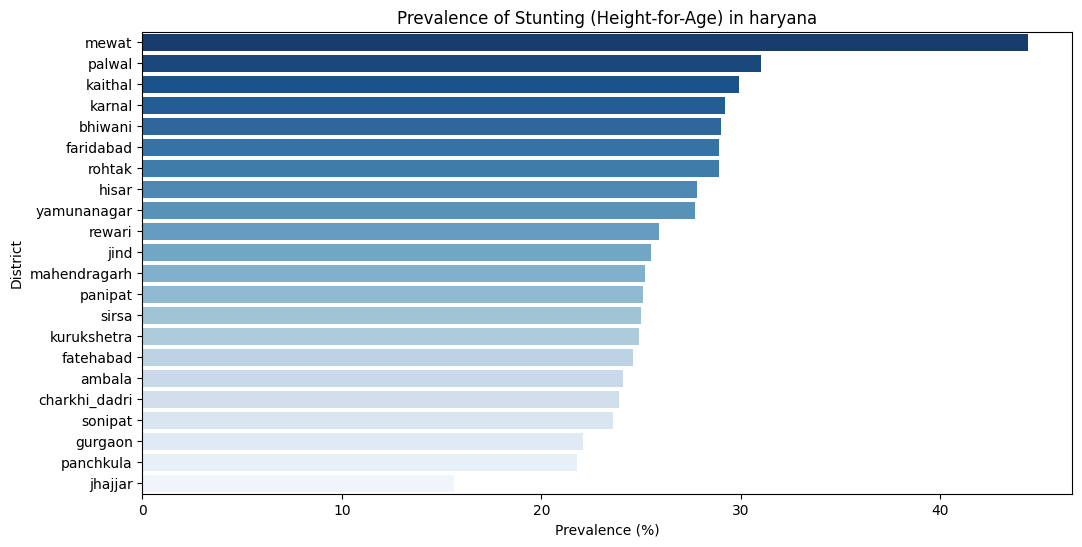

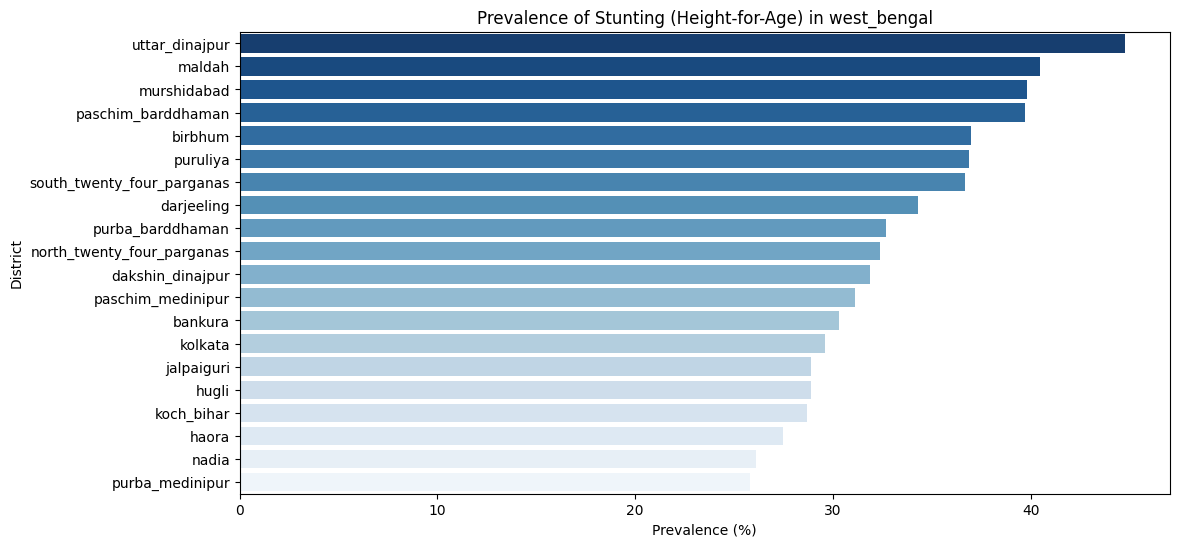

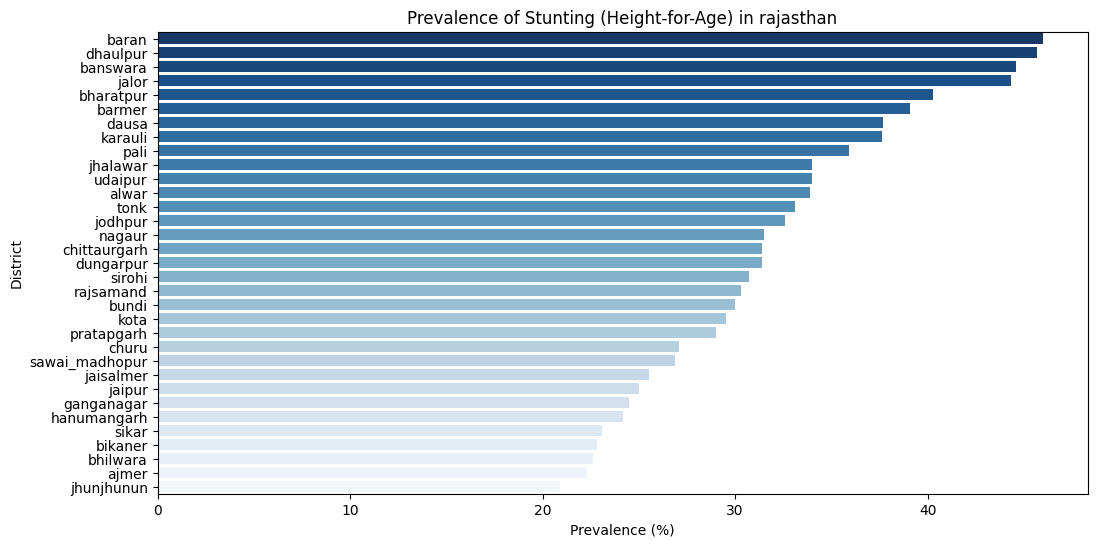

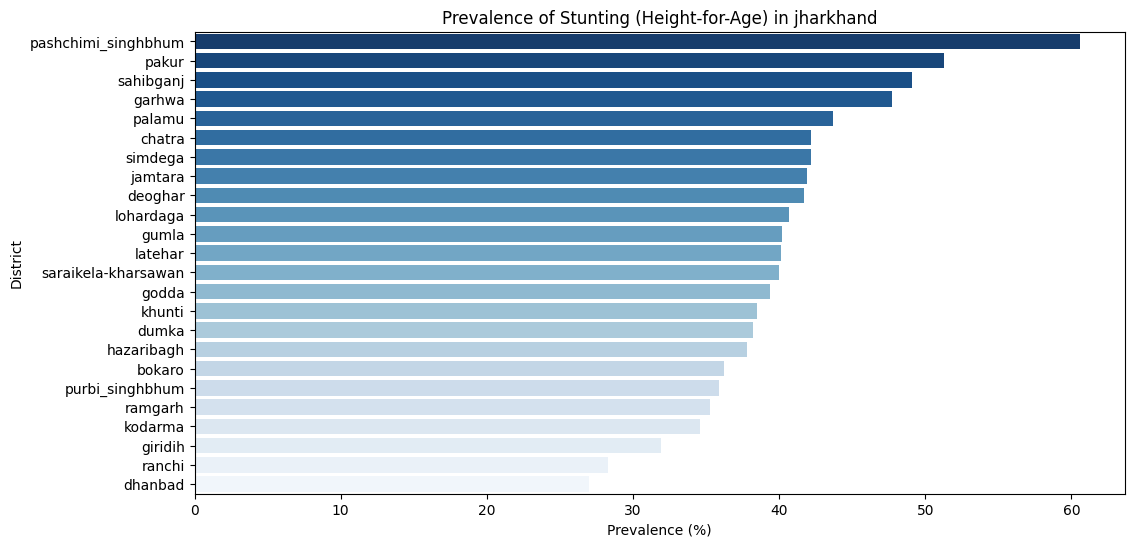

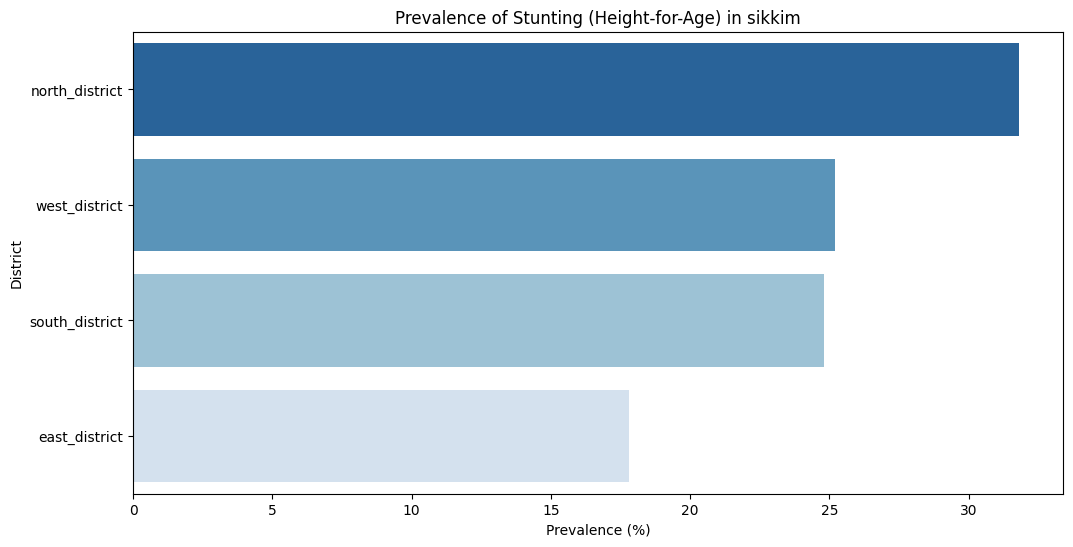

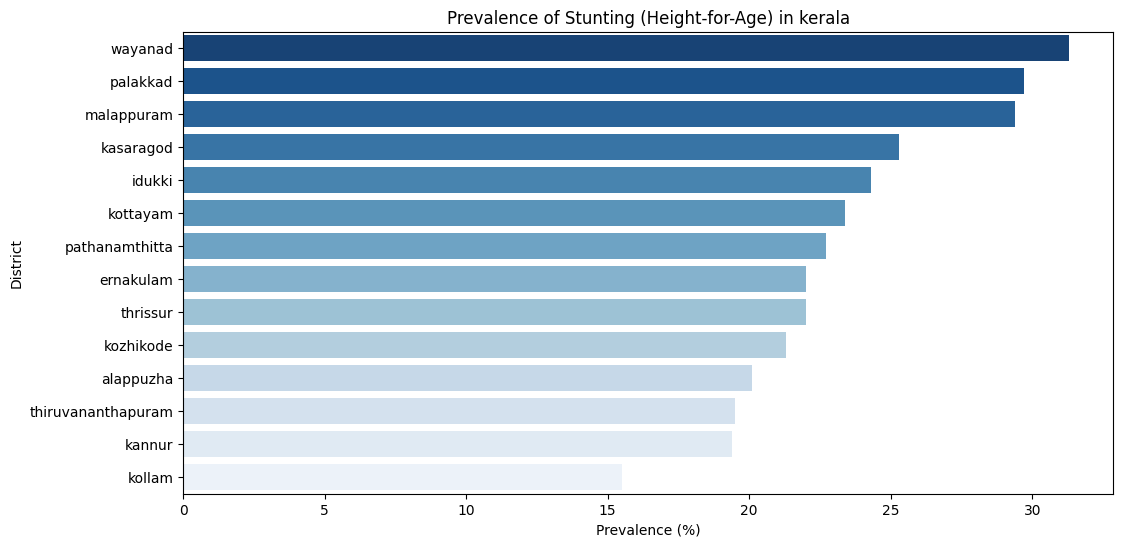

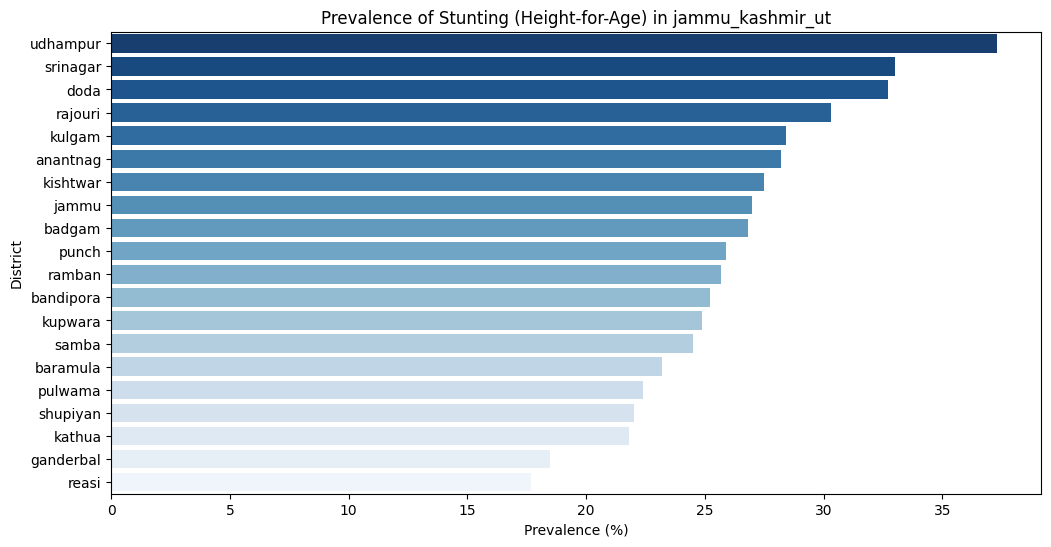

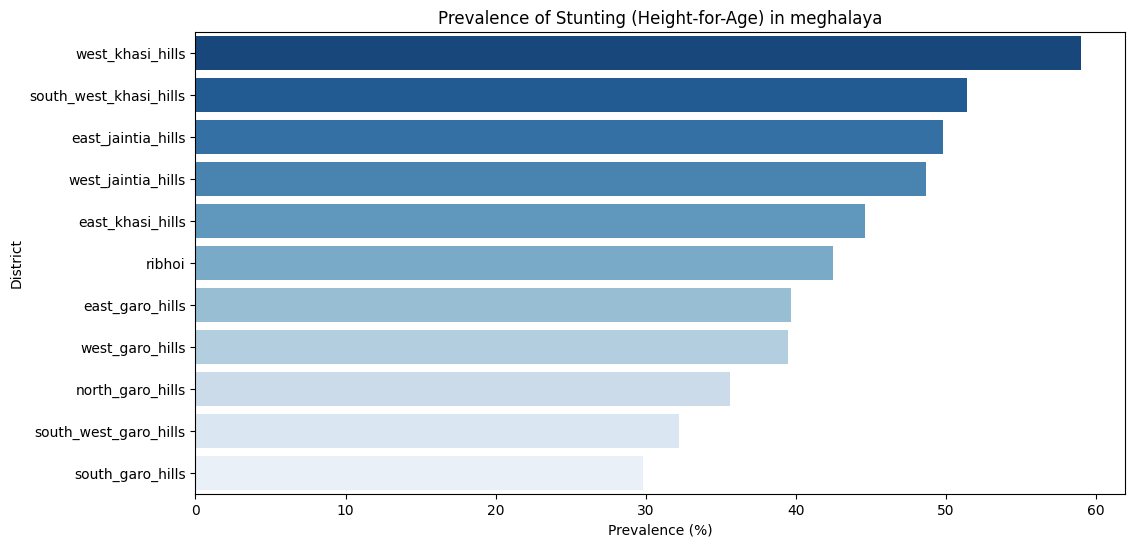

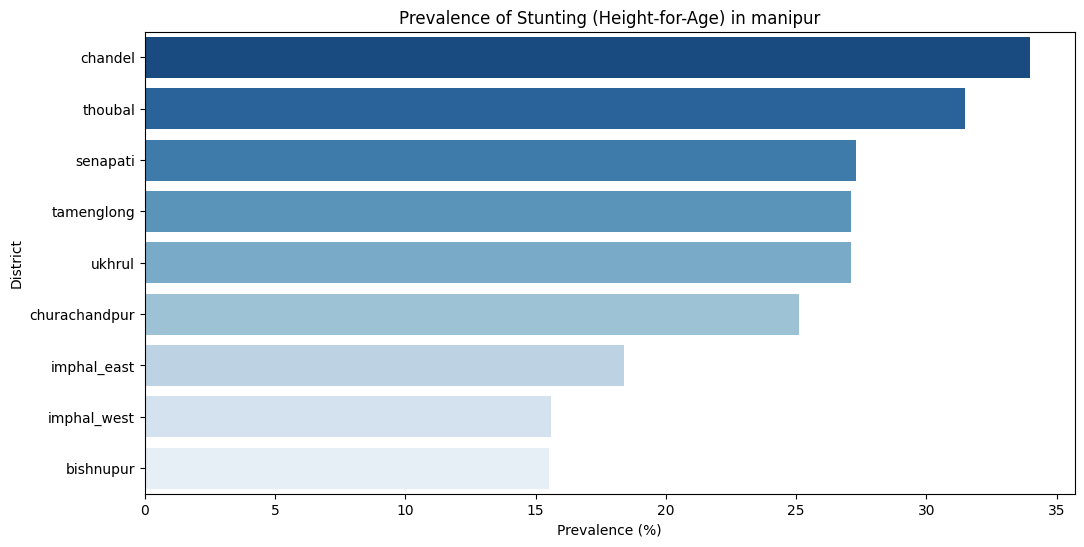

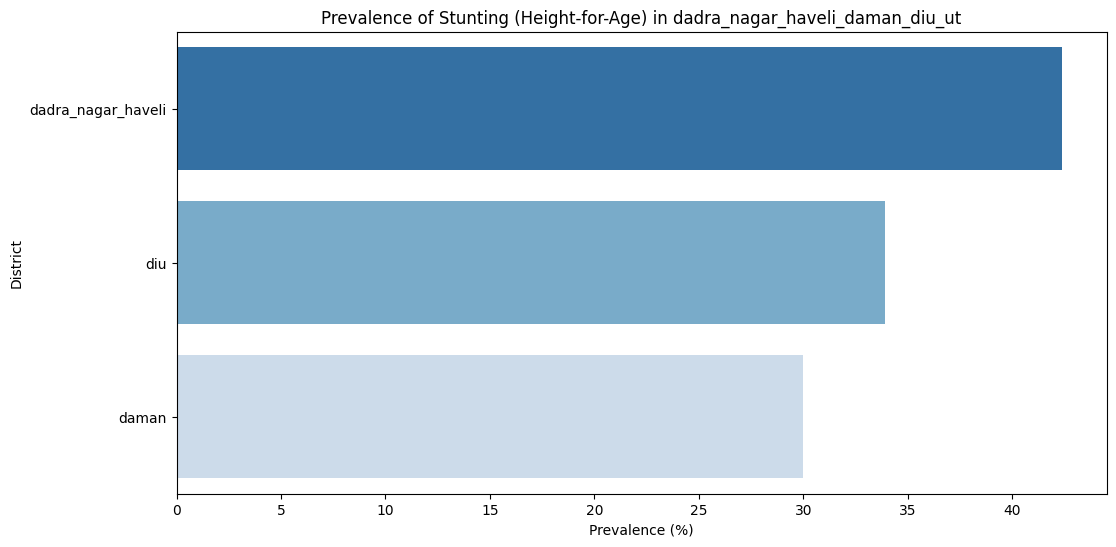

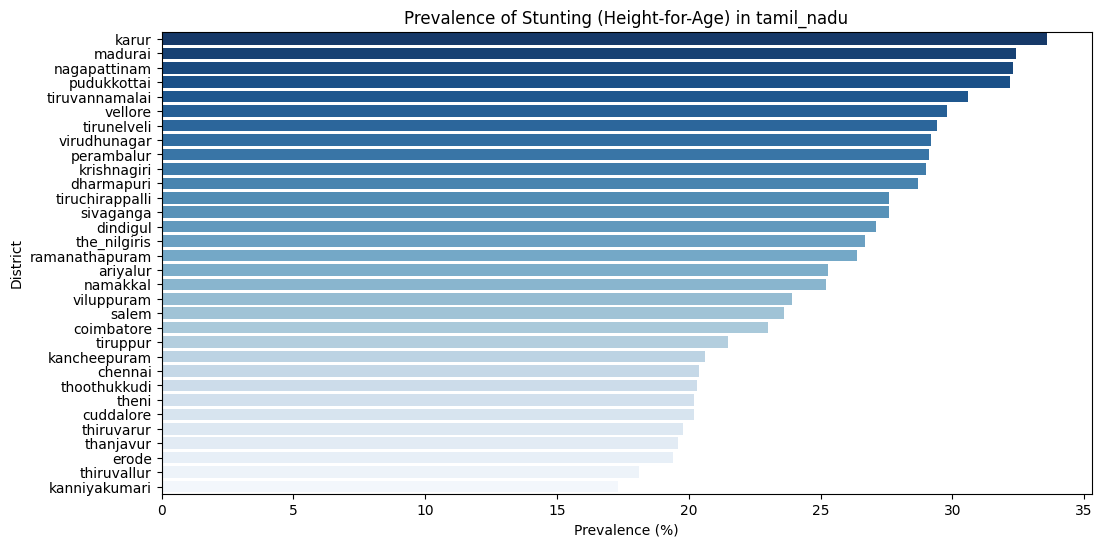

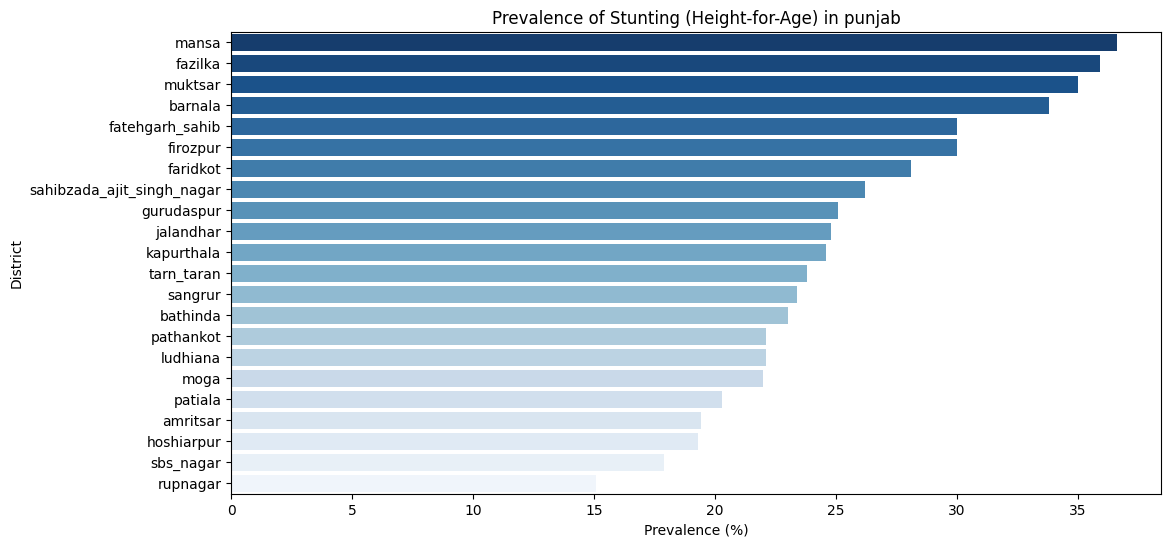

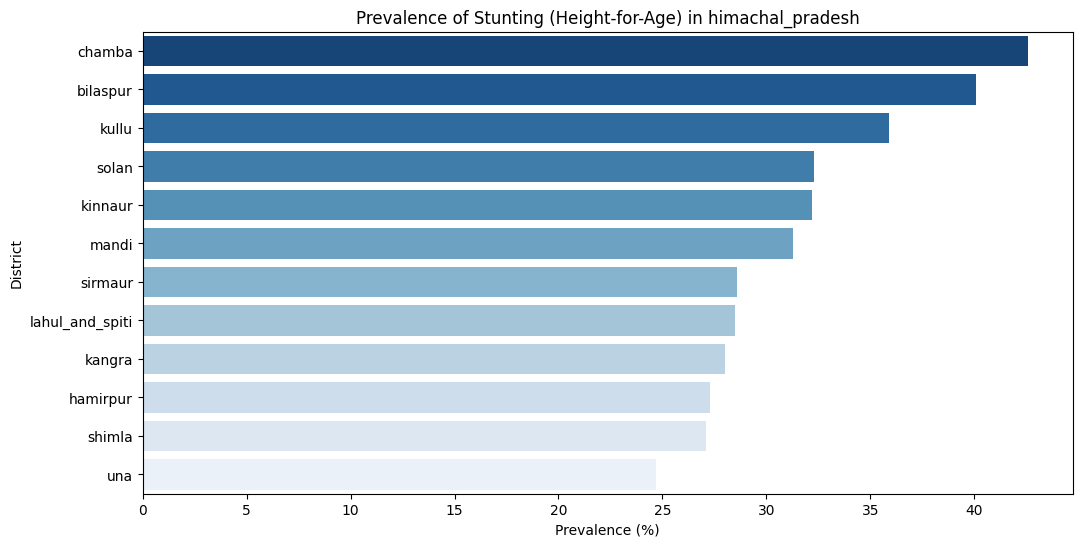

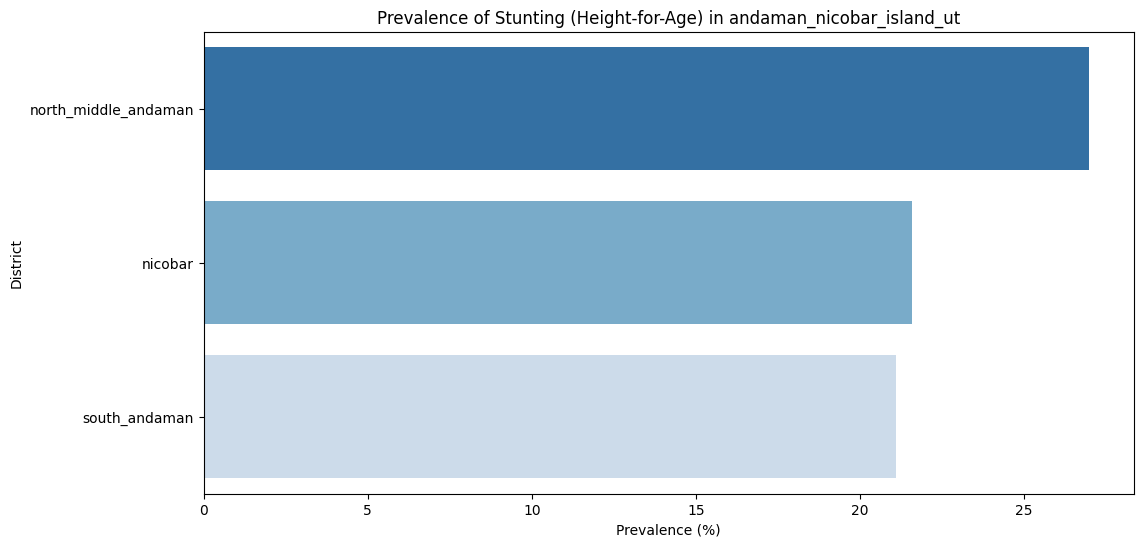

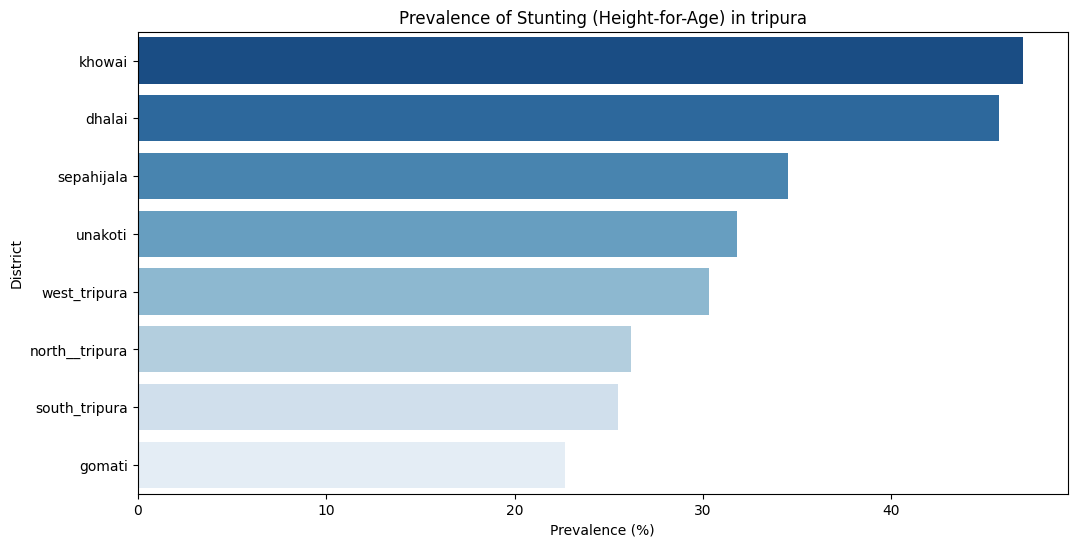

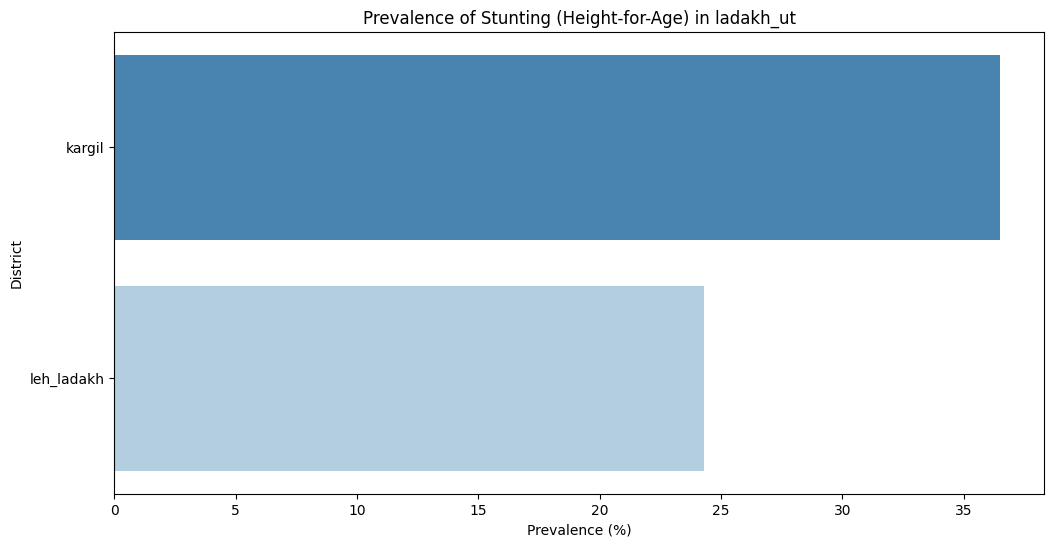

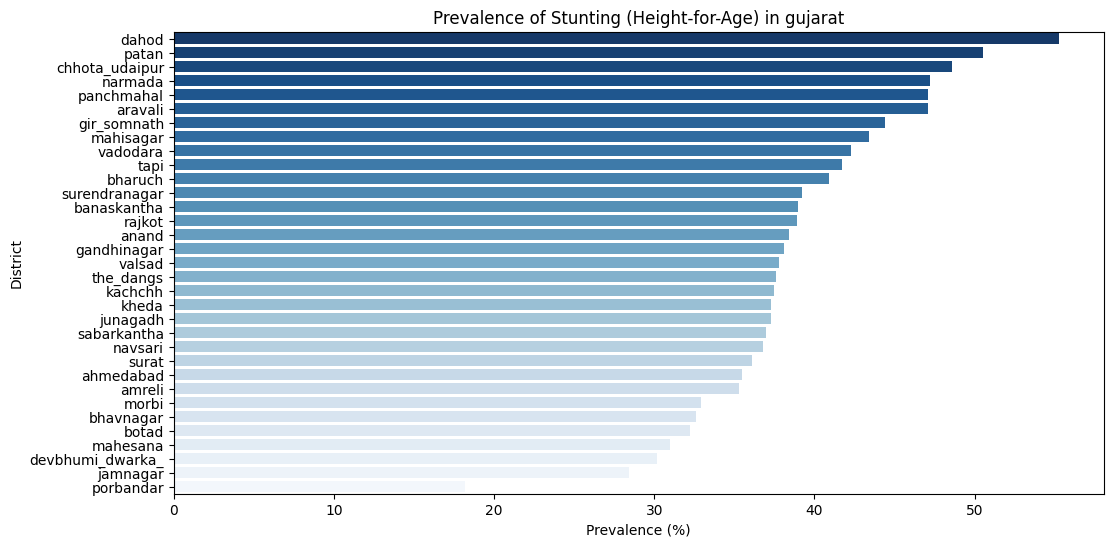

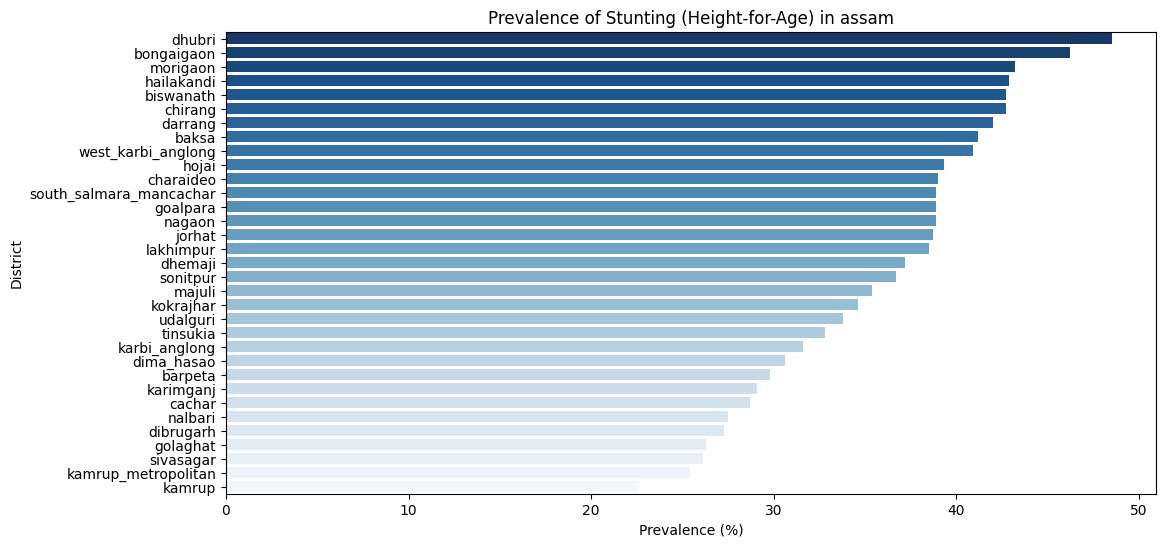

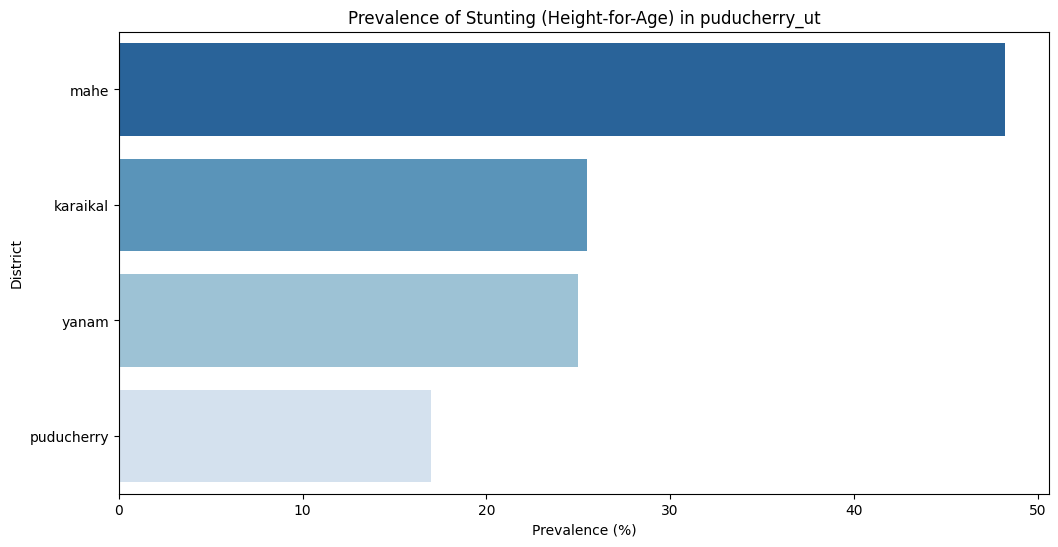

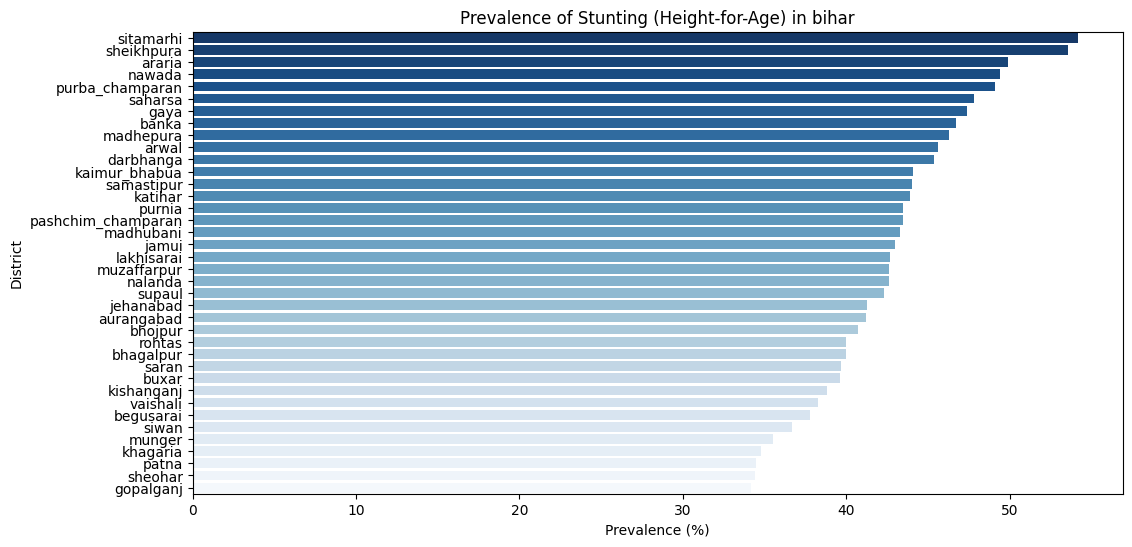

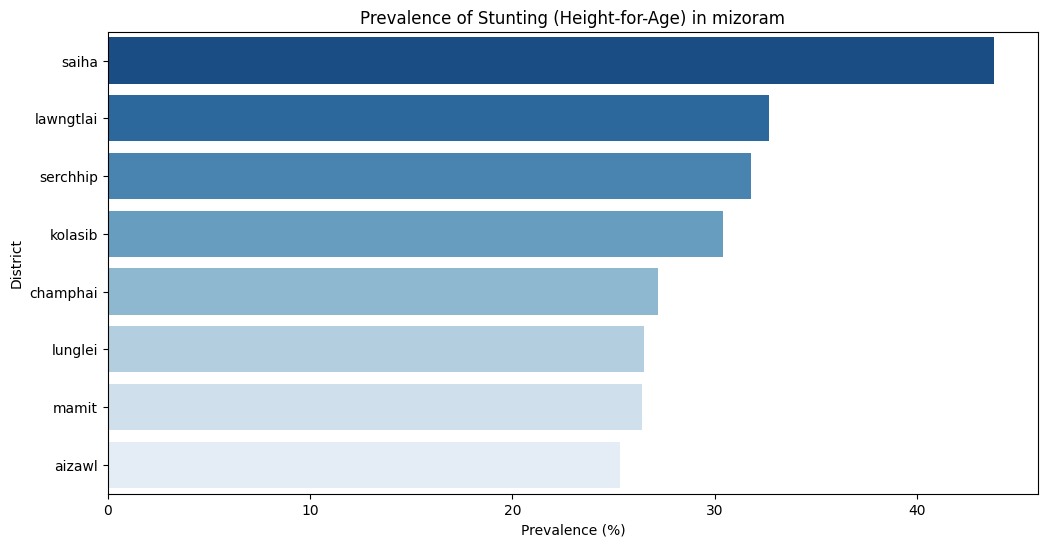

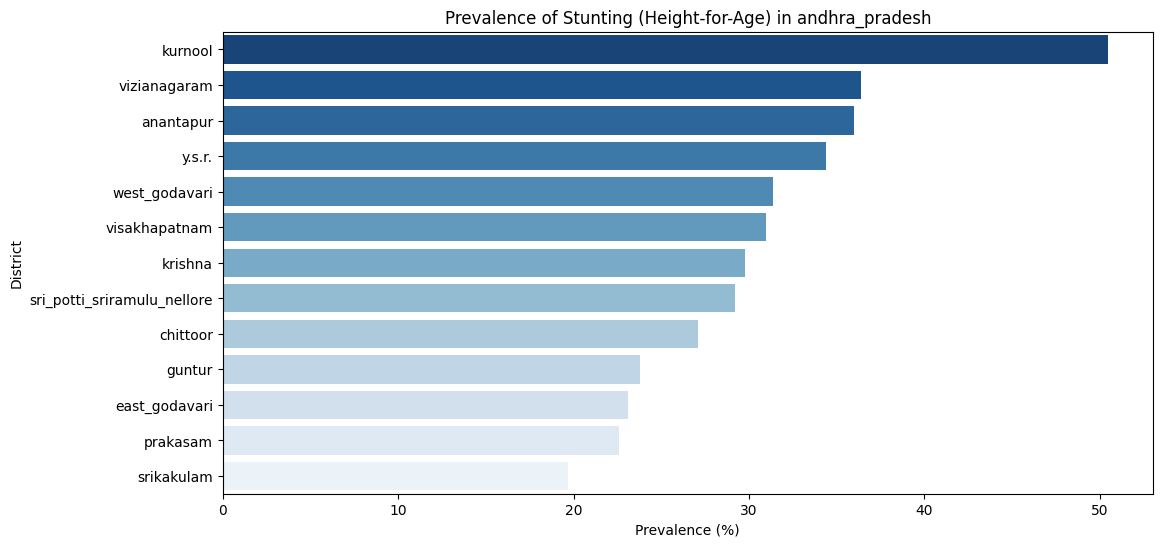

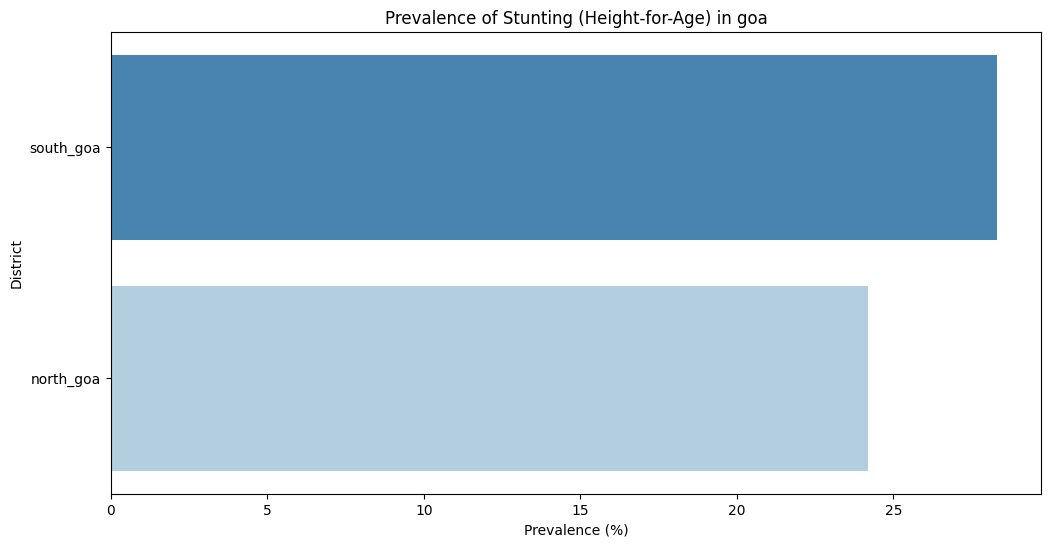

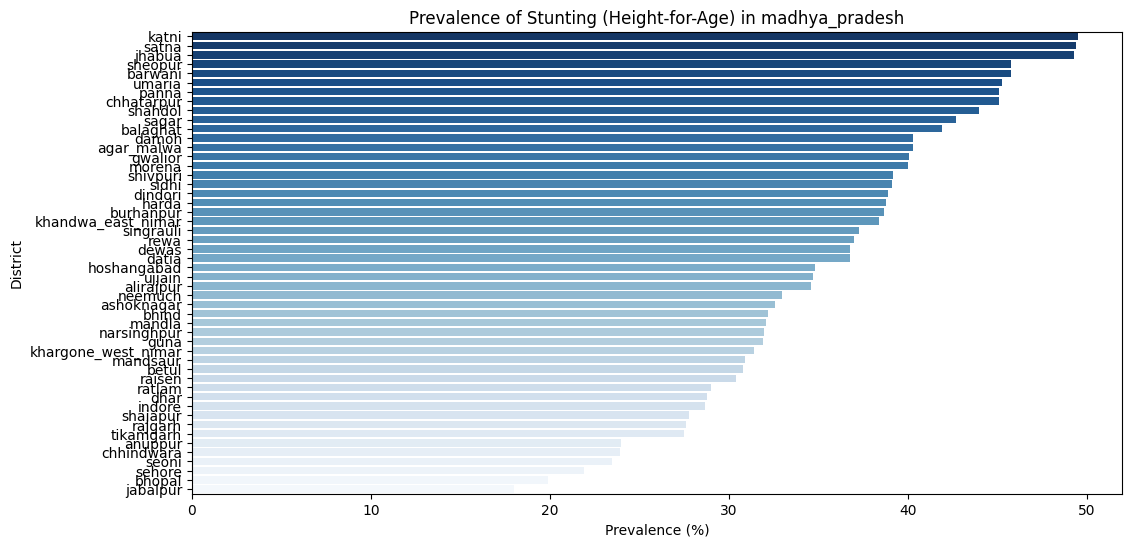

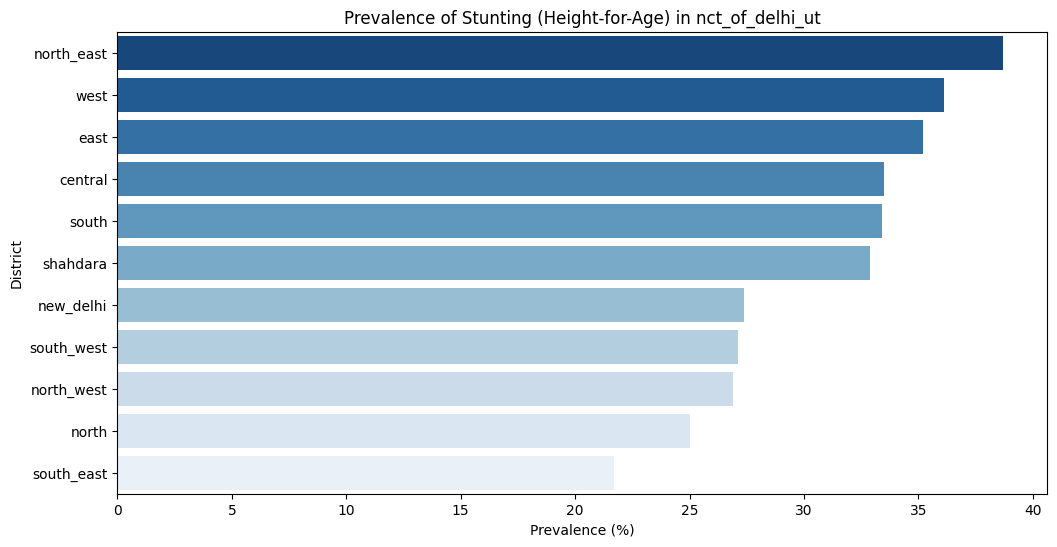

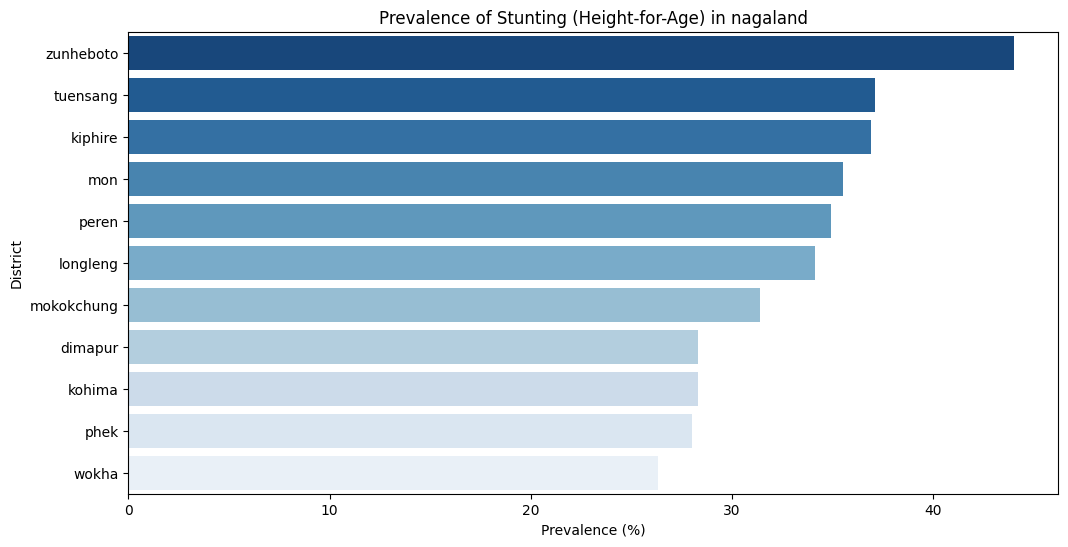

In [ ]:
for state in states_list:
  selected_state = state

  state_data = nfhs[nfhs['state_name'] == selected_state]

  stunting_by_district = state_data.groupby('district_name')['Children under 5 years who are stunted (height-for-age)18 (%)'].mean().sort_values(ascending=False)

  plt.figure(figsize=(12, 6))
  sns.barplot(x=stunting_by_district, y=stunting_by_district.index, palette='Blues_r')
  plt.title(f'Prevalence of Stunting (Height-for-Age) in {selected_state}')
  plt.xlabel('Prevalence (%)')
  plt.ylabel('District')
  plt.show()


##### percentage of children age 6-8 months receiving solid or semi-solid food and breastmilk

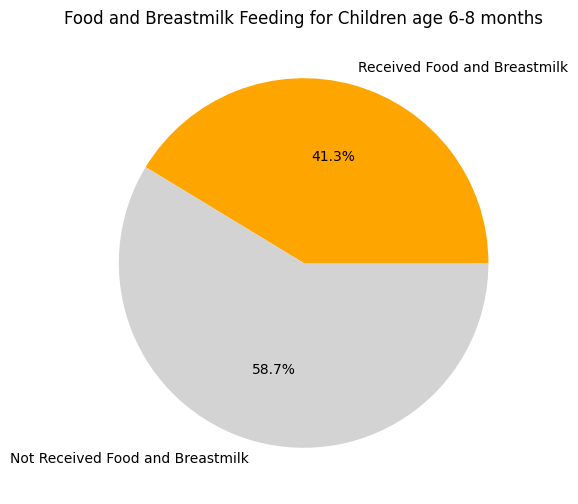

In [ ]:
food_and_breastmilk_coverage = nfhs['Children age 6-8 months receiving solid or semi-solid food and breastmilk16 (%)'].mean()

plt.figure(figsize=(6, 6))
plt.pie([food_and_breastmilk_coverage, 100 - food_and_breastmilk_coverage], labels=['Received Food and Breastmilk', 'Not Received Food and Breastmilk'], autopct='%1.1f%%', colors=['orange', 'lightgray'])
plt.title('Food and Breastmilk Feeding for Children age 6-8 months')
plt.show()


 ##### vaccination coverage for children age 12-23 months differ between public and private health facilities

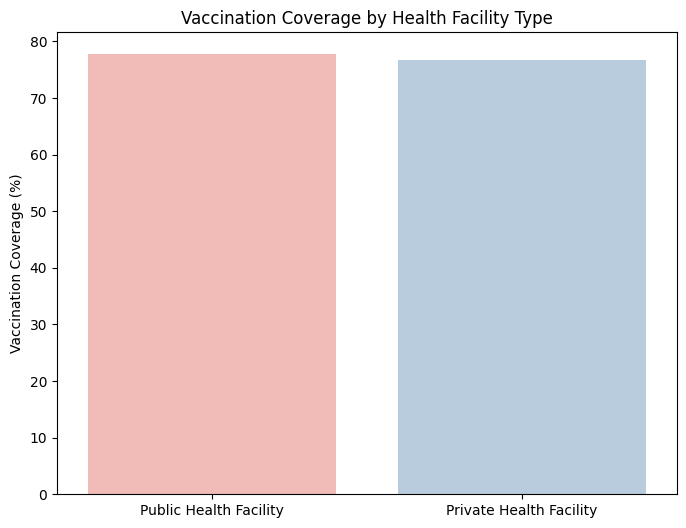

In [ ]:
public_health_facility_coverage = nfhs[nfhs['Children age 12-23 months who received most of their vaccinations in a public health facility (%)'] > 0]['Children age 12-23 months fully vaccinated based on information from either vaccination card or mother\'s recall11 (%)'].mean()
private_health_facility_coverage = nfhs[nfhs['Children age 12-23 months who received most of their vaccinations in a private health facility (%)'] > 0]['Children age 12-23 months fully vaccinated based on information from either vaccination card or mother\'s recall11 (%)'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Public Health Facility', 'Private Health Facility'], y=[public_health_facility_coverage, private_health_facility_coverage], palette='Pastel1')
plt.title('Vaccination Coverage by Health Facility Type')
plt.ylabel('Vaccination Coverage (%)')
plt.show()


##### average percentage of children who have received a vitamin A dose in the last 6 months

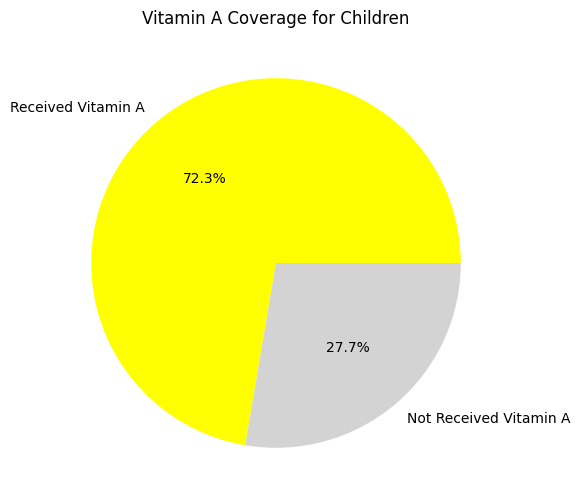

In [ ]:
vitamin_a_coverage = nfhs['Children age 9-35 months who received a vitamin A dose in the last 6 months (%)'].mean()

plt.figure(figsize=(6, 6))
plt.pie([vitamin_a_coverage, 100 - vitamin_a_coverage], labels=['Received Vitamin A', 'Not Received Vitamin A'], autopct='%1.1f%%', colors=['yellow', 'lightgray'])
plt.title('Vitamin A Coverage for Children')
plt.show()


##### Determine the state with the highest average percentage of fully vaccinated children based on both vaccination cards and mother's recall.

State with the Highest Average Fully Vaccinated Rate: ladakh_ut (94.10%)


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


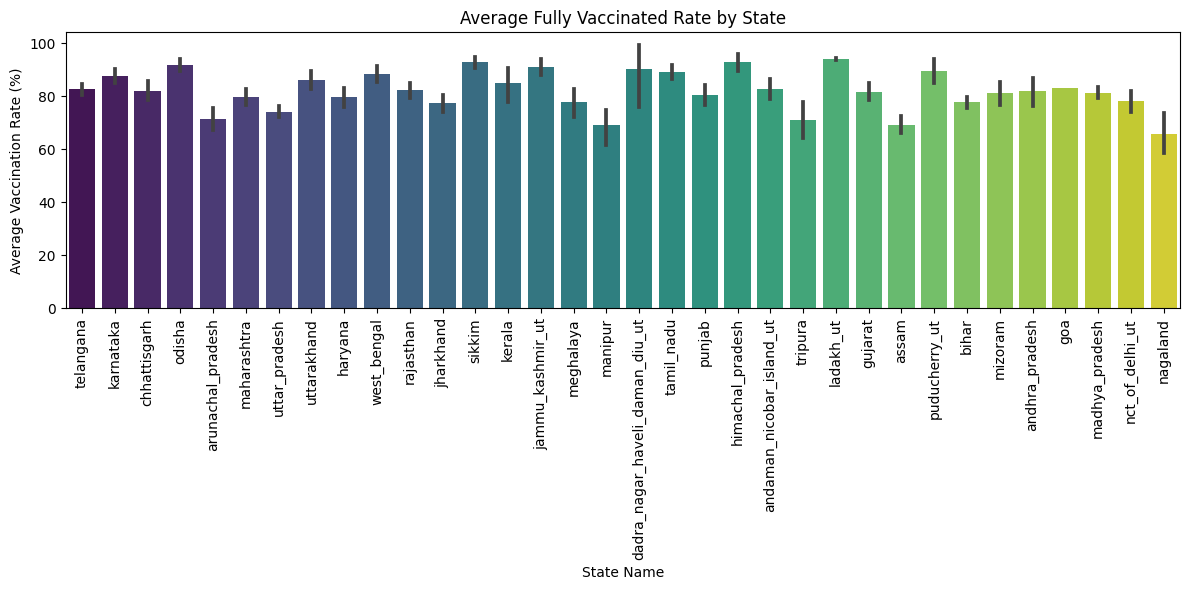

In [ ]:
nfhs['Average Fully Vaccinated Rate (%)'] = (nfhs['Children age 12-23 months fully vaccinated based on information from either vaccination card or mother\'s recall11 (%)'] +
                                             nfhs['Children age 12-23 months fully vaccinated based on information from vaccination card only12 (%)']) / 2

state_with_highest_avg_vaccination = nfhs.groupby('state_name')['Average Fully Vaccinated Rate (%)'].mean().idxmax()
highest_avg_vaccination_rate = nfhs.groupby('state_name')['Average Fully Vaccinated Rate (%)'].mean().max()

print(f"State with the Highest Average Fully Vaccinated Rate: {state_with_highest_avg_vaccination} ({highest_avg_vaccination_rate:.2f}%)")

plt.figure(figsize=(12, 6))
sns.barplot(data=nfhs, x='state_name', y='Average Fully Vaccinated Rate (%)', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Average Vaccination Rate (%)')
plt.title('Average Fully Vaccinated Rate by State')
plt.tight_layout()
plt.show()

In [ ]:
print(f"State with the Highest Average Fully Vaccinated Rate: {state_with_highest_avg_vaccination} ({highest_avg_vaccination_rate:.2f}%)")

State with the Highest Average Fully Vaccinated Rate: ladakh_ut (94.10%)


In [ ]:
state_with_lowest_avg_vaccination = nfhs.groupby('state_name')['Average Fully Vaccinated Rate (%)'].mean().idxmin()
lowest_avg_vaccination_rate = nfhs.groupby('state_name')['Average Fully Vaccinated Rate (%)'].mean().min()

In [ ]:
print(f"State with the Lowest Average Fully Vaccinated Rate: {state_with_lowest_avg_vaccination} ({lowest_avg_vaccination_rate:.2f}%)")

State with the Lowest Average Fully Vaccinated Rate: nagaland (65.73%)


##### percentage of children aged 12-23 months who received most of their vaccinations in private health facilities.

In [ ]:
private_health_facility_percentage_by_state = nfhs.groupby('state_name')['Children age 12-23 months who received most of their vaccinations in a private health facility (%)'].mean()
print("Percentage of children aged 12-23 months who received most vaccinations in private health facilities by state:")
print(private_health_facility_percentage_by_state)

Percentage of children aged 12-23 months who received most vaccinations in private health facilities by state:
state_name
andaman_nicobar_island_ut           2.150000
andhra_pradesh                      3.458333
arunachal_pradesh                   0.605263
assam                               2.330303
bihar                               1.934211
chhattisgarh                        2.055556
dadra_nagar_haveli_daman_diu_ut     1.966667
goa                                 6.200000
gujarat                             6.157576
haryana                             2.180952
himachal_pradesh                    1.833333
jammu_kashmir_ut                    0.395000
jharkhand                           2.254167
karnataka                           5.140000
kerala                              9.927273
ladakh_ut                           0.000000
madhya_pradesh                      0.680851
maharashtra                         5.535294
manipur                             5.333333
meghalaya              

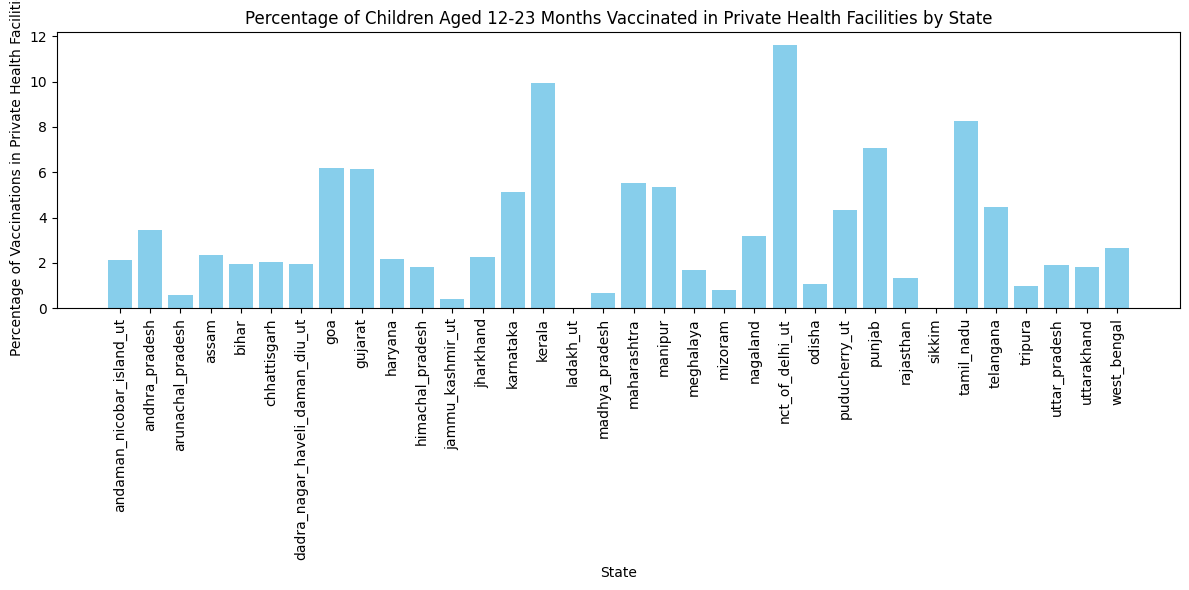

In [ ]:
private_health_facility_percentage_by_state = nfhs.groupby('state_name')['Children age 12-23 months who received most of their vaccinations in a private health facility (%)'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(private_health_facility_percentage_by_state['state_name'], private_health_facility_percentage_by_state['Children age 12-23 months who received most of their vaccinations in a private health facility (%)'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Percentage of Vaccinations in Private Health Facilities')
plt.title('Percentage of Children Aged 12-23 Months Vaccinated in Private Health Facilities by State')
plt.tight_layout()
plt.show()

##### Calculate the percentage of children aged 12-23 months who received most of their vaccinations in public health facilities.

In [ ]:
public_health_facility_percentage_by_state = nfhs.groupby('state_name')['Children age 12-23 months who received most of their vaccinations in a public health facility (%)'].mean()
print("Percentage of children aged 12-23 months who received most vaccinations in public health facilities by state:")
print(public_health_facility_percentage_by_state)

Percentage of children aged 12-23 months who received most vaccinations in public health facilities by state:
state_name
andaman_nicobar_island_ut           96.550000
andhra_pradesh                      95.408333
arunachal_pradesh                   97.710526
assam                               95.378788
bihar                               96.984211
chhattisgarh                        97.433333
dadra_nagar_haveli_daman_diu_ut     98.033333
goa                                 93.800000
gujarat                             93.584848
haryana                             97.095238
himachal_pradesh                    97.633333
jammu_kashmir_ut                    99.105000
jharkhand                           97.262500
karnataka                           94.596667
kerala                              89.718182
ladakh_ut                          100.000000
madhya_pradesh                      99.014894
maharashtra                         93.982353
manipur                             92.633333
megha

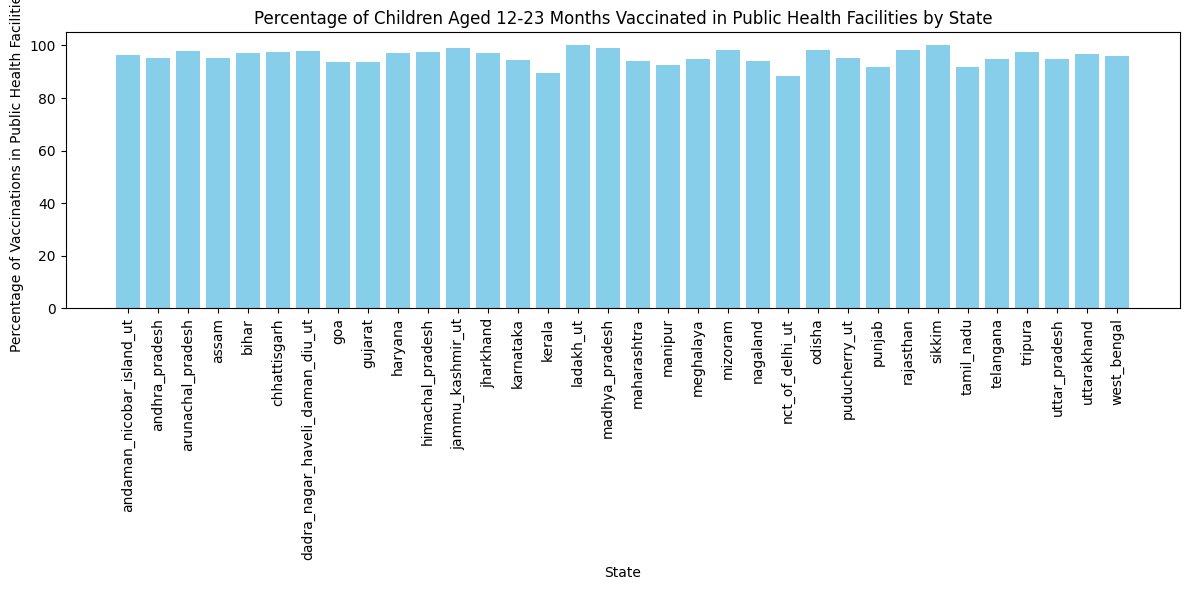

In [ ]:
public_health_facility_percentage_by_state = nfhs.groupby('state_name')['Children age 12-23 months who received most of their vaccinations in a public health facility (%)'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(public_health_facility_percentage_by_state['state_name'], public_health_facility_percentage_by_state['Children age 12-23 months who received most of their vaccinations in a public health facility (%)'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Percentage of Vaccinations in Public Health Facilities')
plt.title('Percentage of Children Aged 12-23 Months Vaccinated in Public Health Facilities by State')
plt.tight_layout()
plt.show()

this shows that the in India a maximum number of children below the age of 12 still recieve a majority iof their vaccinations in public health facilities

##### district with the highest difference in vaccination rates between the first and second doses of MCV.

In [ ]:
nfhs['Difference MCV Doses (%)'] = nfhs['Children age 12-23 months who have received the first dose of measles-containing vaccine (MCV) (%)'] - nfhs['Children age 24-35 months who have received a second dose of measles-containing vaccine (MCV) (%)']

district_with_highest_difference = nfhs.loc[nfhs['Difference MCV Doses (%)'].idxmax()]

print("District with the Highest Difference in MCV Doses:")
print(district_with_highest_difference[['district_name', 'Difference MCV Doses (%)']])

District with the Highest Difference in MCV Doses:
district_name               kasaragod
Difference MCV Doses (%)         88.0
Name: 376, dtype: object


In [ ]:
nfhs_sorted = nfhs.sort_values(by='Difference MCV Doses (%)', ascending=False)

top_10_districts = nfhs_sorted.head(10)

bottom_10_districts = nfhs_sorted.tail(10)

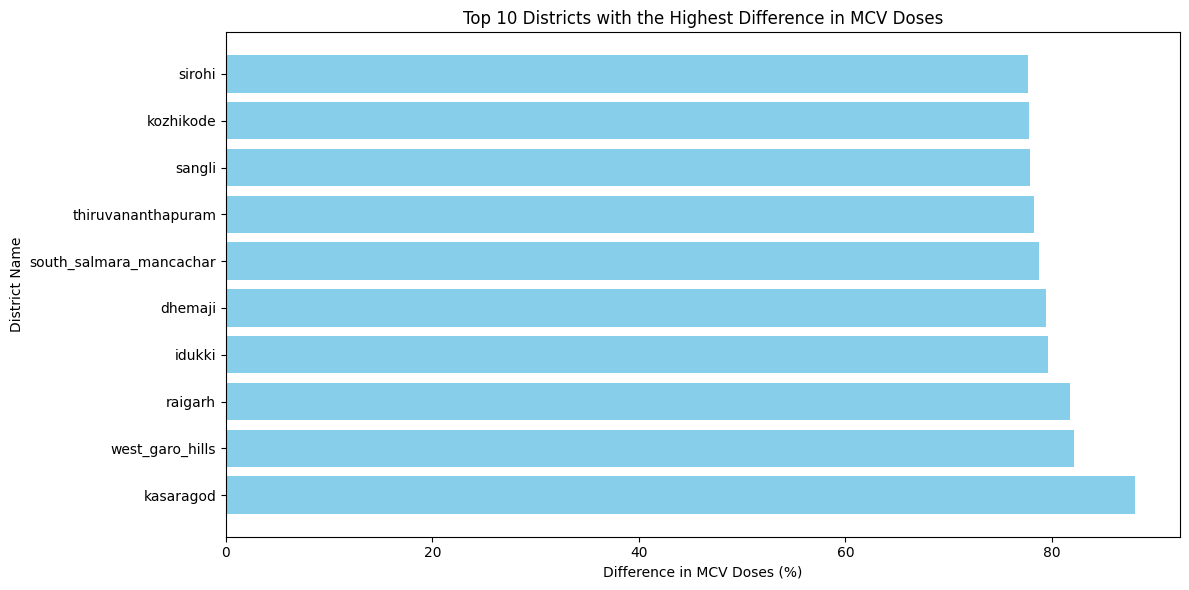

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(top_10_districts['district_name'], top_10_districts['Difference MCV Doses (%)'], color='skyblue')
plt.xlabel('Difference in MCV Doses (%)')
plt.ylabel('District Name')
plt.title('Top 10 Districts with the Highest Difference in MCV Doses')
plt.tight_layout()
plt.show()

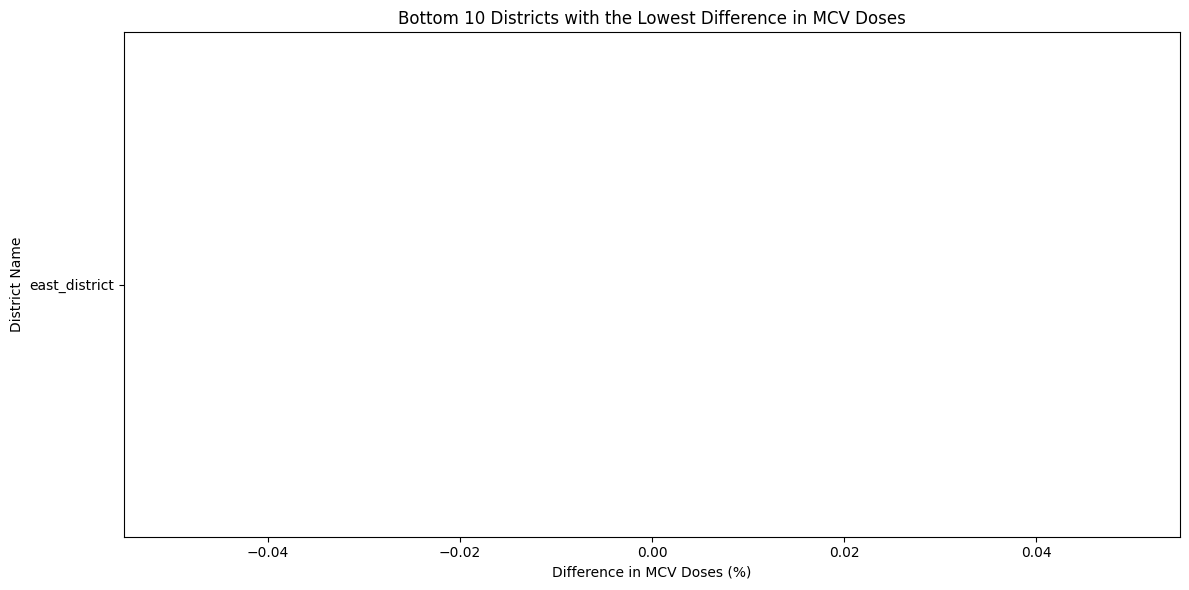

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(bottom_10_districts['district_name'], bottom_10_districts['Difference MCV Doses (%)'], color='coral')
plt.xlabel('Difference in MCV Doses (%)')
plt.ylabel('District Name')
plt.title('Bottom 10 Districts with the Lowest Difference in MCV Doses')
plt.tight_layout()
plt.show()

In [ ]:
highest_vaccination_districts = nfhs.sort_values(by='Children age 12-23 months fully vaccinated based on information from either vaccination card or mother\'s recall11 (%)', ascending=False).head(10)

print("Top 10 Districts with the Highest Vaccination Rates:")
print(highest_vaccination_districts[['state_name', 'district_name', 'Children age 12-23 months fully vaccinated based on information from either vaccination card or mother\'s recall11 (%)']])

Top 10 Districts with the Highest Vaccination Rates:
                          state_name       district_name  \
484                 himachal_pradesh              chamba   
41                         karnataka          ramanagara   
108                           odisha            debagarh   
438                       tamil_nadu        thoothukkudi   
419  dadra_nagar_haveli_daman_diu_ut  dadra_nagar_haveli   
486                 himachal_pradesh            bilaspur   
471                           punjab           sbs_nagar   
381                 jammu_kashmir_ut              kathua   
386                 jammu_kashmir_ut              kulgam   
96                            odisha             koraput   

     Children age 12-23 months fully vaccinated based on information from either vaccination card or mother's recall11 (%)  
484                                              100.0                                                                      
41                                  

##### States with highest vaccination rates by state

In [ ]:
state_vaccination_rates = nfhs.groupby('state_name')['Children age 12-23 months fully vaccinated based on information from either vaccination card or mother\'s recall11 (%)'].mean()
highest_vaccination_states = state_vaccination_rates.nlargest(10)

print("\nTop 10 States with the Highest Vaccination Rates:")
print(highest_vaccination_states)



Top 10 States with the Highest Vaccination Rates:
state_name
odisha                             91.773333
sikkim                             91.366667
dadra_nagar_haveli_daman_diu_ut    90.400000
tamil_nadu                         89.060000
himachal_pradesh                   89.041667
ladakh_ut                          88.200000
west_bengal                        87.225000
jammu_kashmir_ut                   87.125000
karnataka                          86.420000
puducherry_ut                      86.000000
Name: Children age 12-23 months fully vaccinated based on information from either vaccination card or mother's recall11 (%), dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


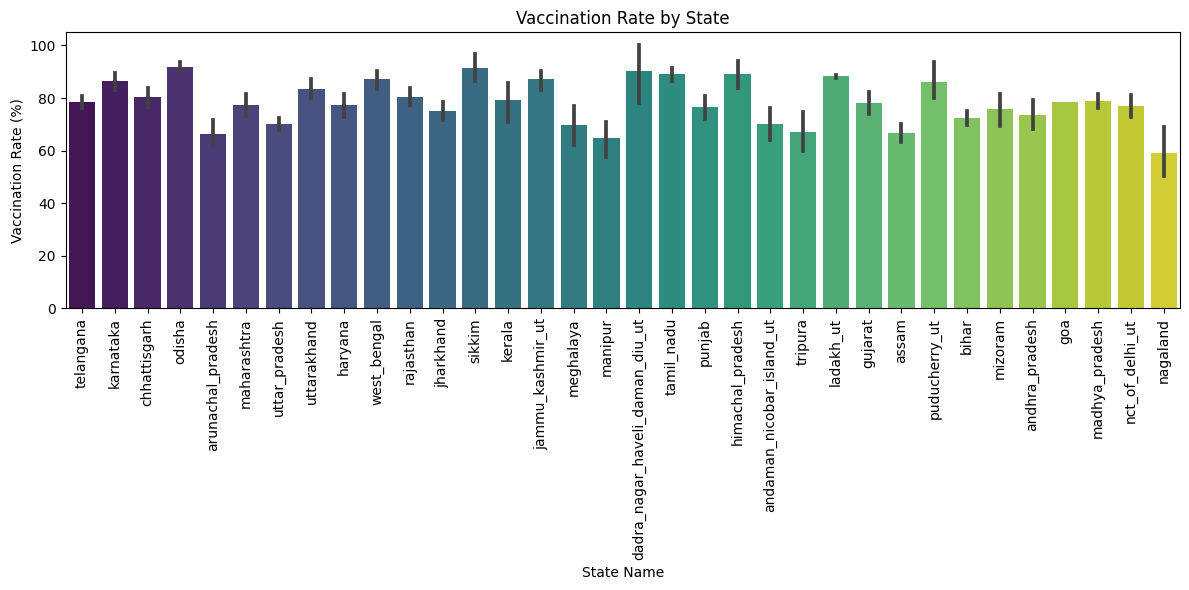

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=nfhs, x='state_name', y='Children age 12-23 months fully vaccinated based on information from either vaccination card or mother\'s recall11 (%)', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Vaccination Rate (%)')
plt.title('Vaccination Rate by State')
plt.tight_layout()
plt.show()

##### lowest vaccination disticts along with the states in which they are present

In [ ]:
lowest_vaccination_districts = nfhs.sort_values(by='Children age 12-23 months fully vaccinated based on information from either vaccination card or mother\'s recall11 (%)', ascending=True).head(10)

print("Top 10 Districts with the Lowest Vaccination Rates:")
print(lowest_vaccination_districts[['state_name', 'district_name', 'Children age 12-23 months fully vaccinated based on information from either vaccination card or mother\'s recall11 (%)']])

Top 10 Districts with the Lowest Vaccination Rates:
        state_name       district_name  \
546          assam            udalguri   
412        manipur              ukhrul   
700       nagaland            tuensang   
701       nagaland             kiphire   
693       nagaland               wokha   
525        gujarat         banaskantha   
239  uttar_pradesh              jhansi   
401      meghalaya    north_garo_hills   
534          assam  west_karbi_anglong   
496        tripura       south_tripura   

     Children age 12-23 months fully vaccinated based on information from either vaccination card or mother's recall11 (%)  
546                                               38.3                                                                      
412                                               39.4                                                                      
700                                               39.9                                                        

##### Rough work to see the number of districts and then understand about percentages as when comparing by districts the number of districts amke a huge difference.

In [ ]:
districts_per_state = nfhs['state_name'].value_counts()

print("Number of Districts Based on State Name:")
print(districts_per_state)

Number of Districts Based on State Name:
uttar_pradesh                      75
madhya_pradesh                     50
bihar                              38
maharashtra                        36
assam                              33
rajasthan                          33
gujarat                            33
tamil_nadu                         32
telangana                          31
karnataka                          30
odisha                             30
chhattisgarh                       27
jharkhand                          24
haryana                            22
punjab                             22
west_bengal                        20
jammu_kashmir_ut                   20
arunachal_pradesh                  20
kerala                             14
uttarakhand                        13
andhra_pradesh                     13
himachal_pradesh                   12
nct_of_delhi_ut                    11
nagaland                           11
meghalaya                          11
manipur  